In [1]:
import spacy
spacy.__version__

'3.7.5'

In [2]:
# Import the english language class
from spacy.lang.en import English

nlp = English()

/home/ishan/miniconda3/envs/NLP/lib/python3.11/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/home/ishan/miniconda3/envs/NLP/lib/python3.11/site-packages/transformers/utils/generic.py:309: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(


In [3]:

doc = nlp("Hello World!")

for token in doc:
    print(token.text)

Hello
World
!


In [4]:
print(doc.text)

Hello World!


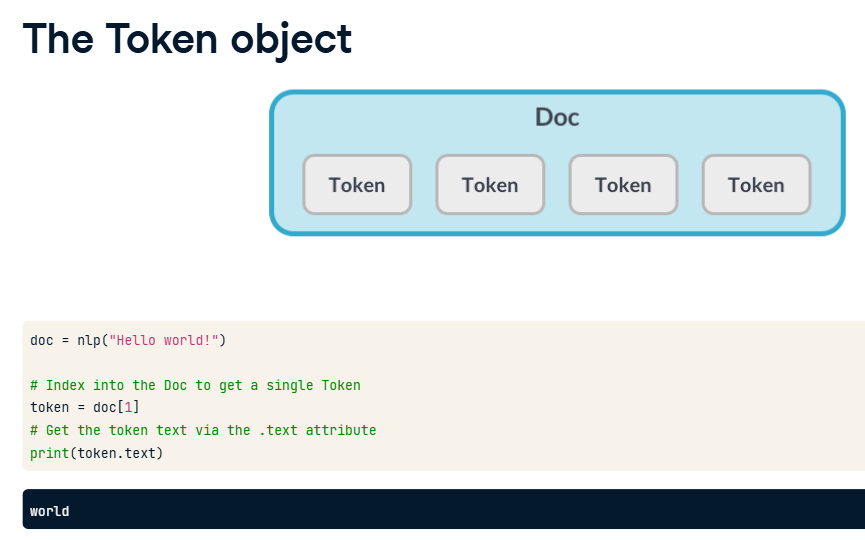

In [5]:
token = doc[1]
print(token.text)

World


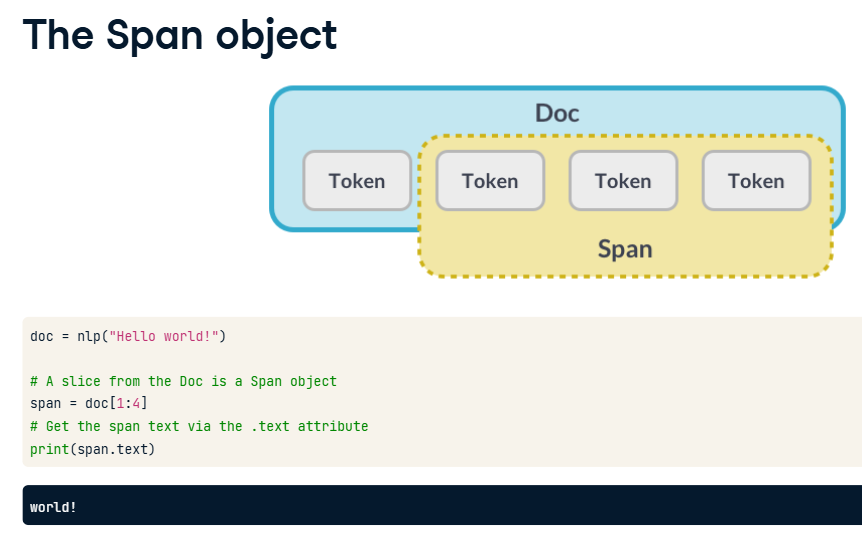

In [6]:
span = doc[1:4]

print(span.text)

World!


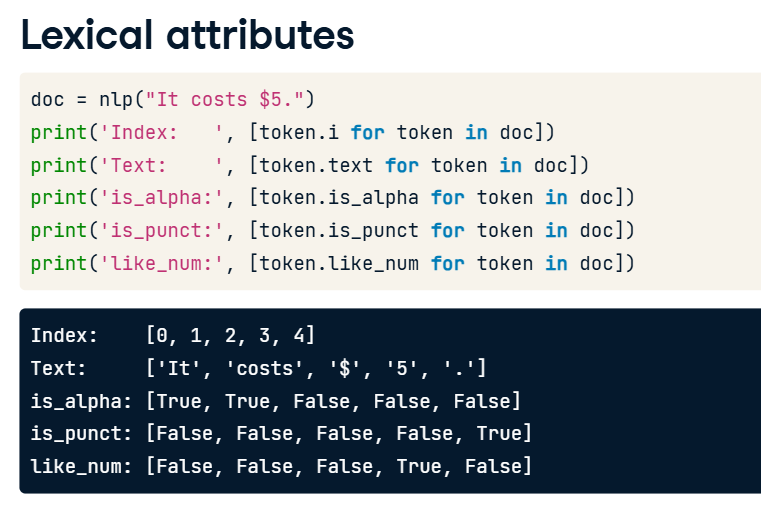

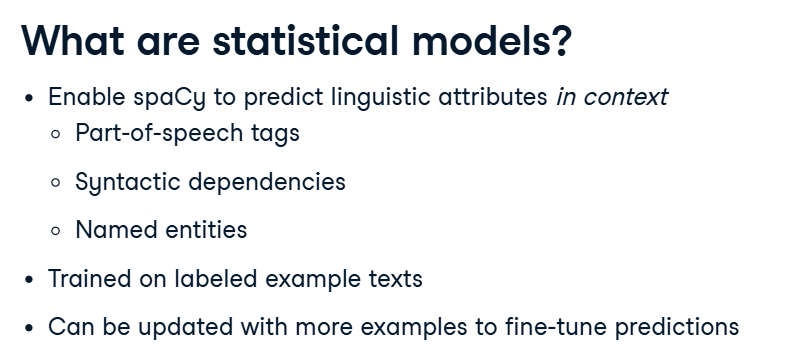

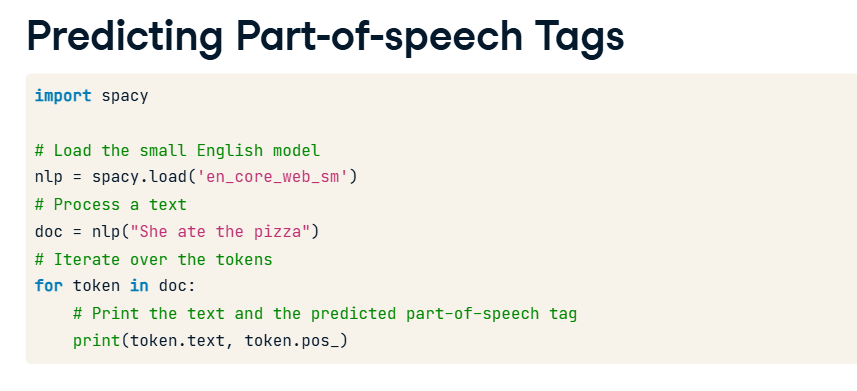

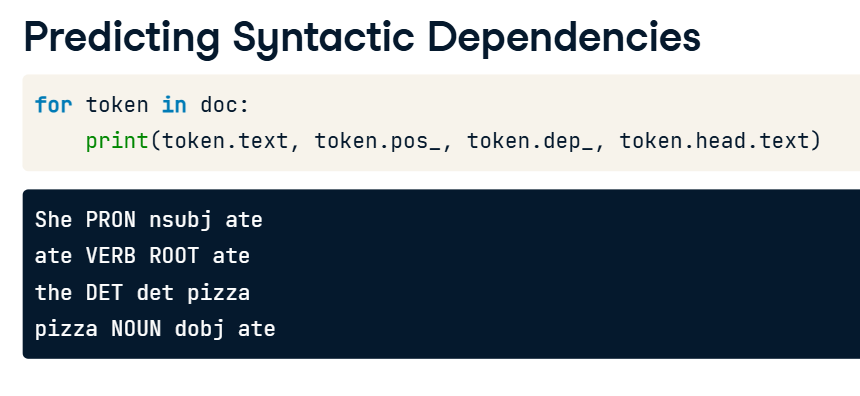

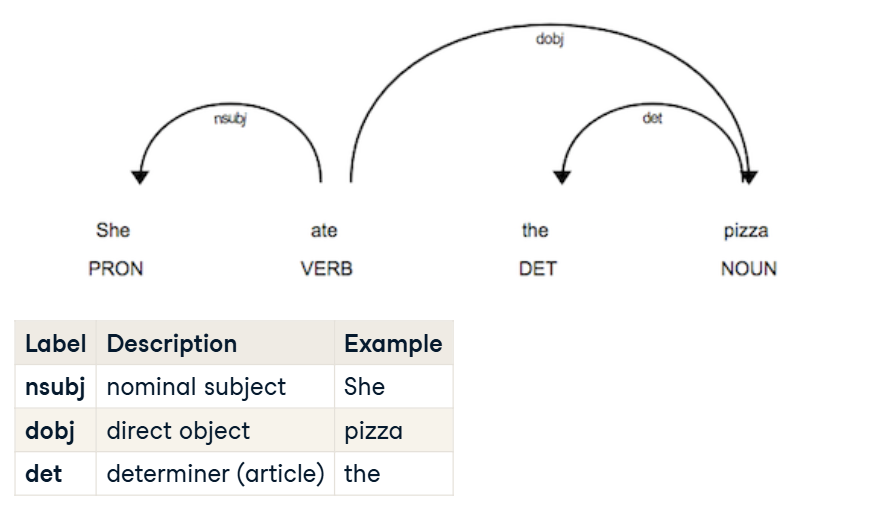

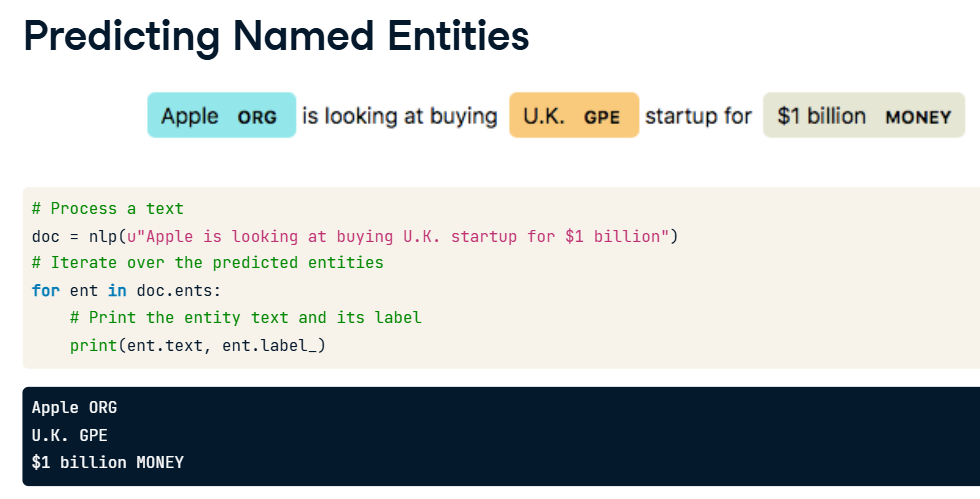

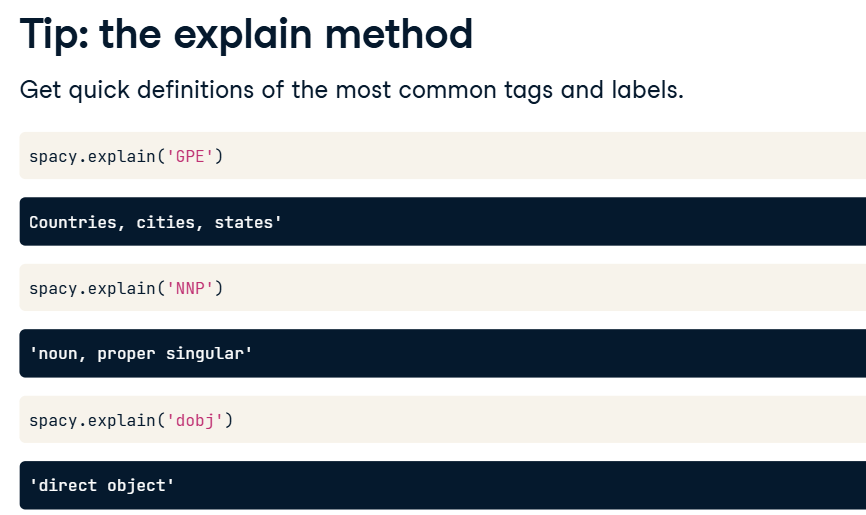

## Rule Based Matching

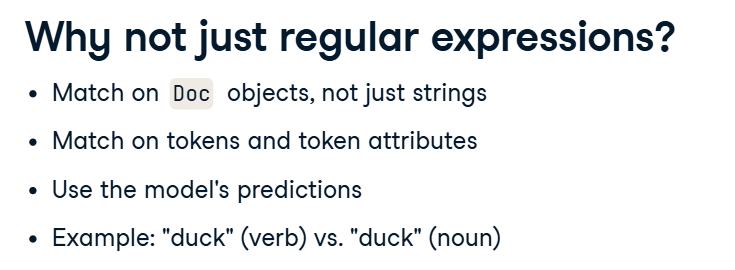

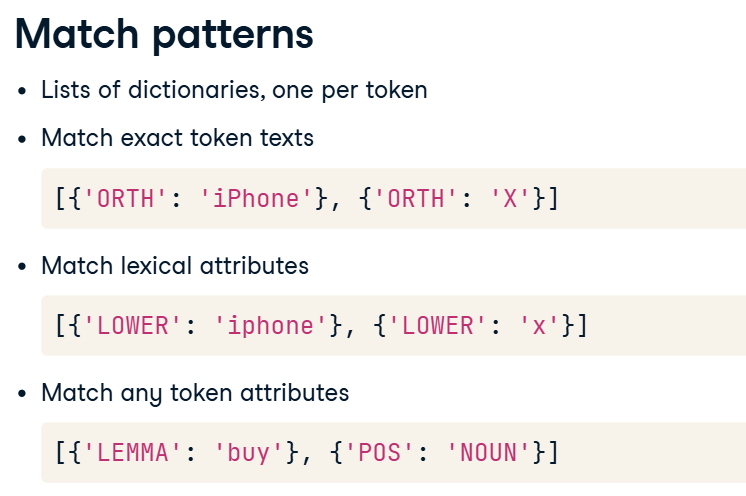

In [7]:
# Import matcher
from spacy.matcher import Matcher

# load a model and create a nlp object
nlp = spacy.load('en_core_web_sm')

# Initialize the matcher with shared vocab
matcher = Matcher(nlp.vocab)

# Add a pattern to the matcher
pattern = [[{'ORTH' : 'iPhone'} , {'ORTH' : 'X'}]]
matcher.add('IPHONE_PATTERN' , pattern)

# prcoess the text
doc = nlp("New iPhone X release date leaked")

# call matcher on doc
matches = matcher(doc)

for match_id , start , end in matches:
    matched_span = doc[start:end]
    print(matched_span.text)

iPhone X


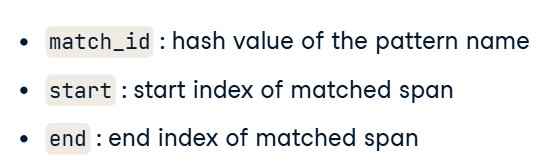

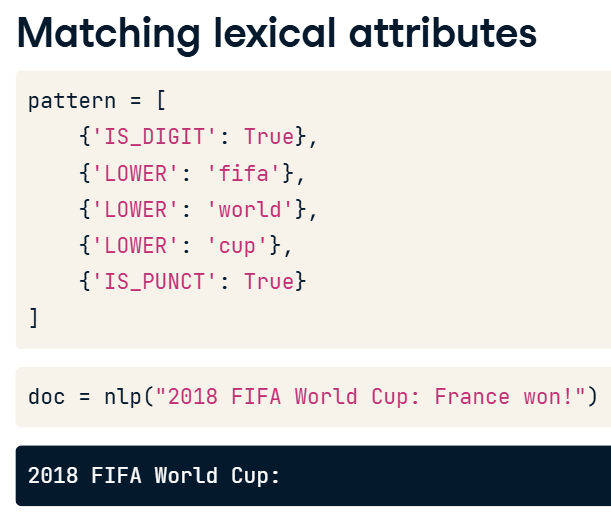

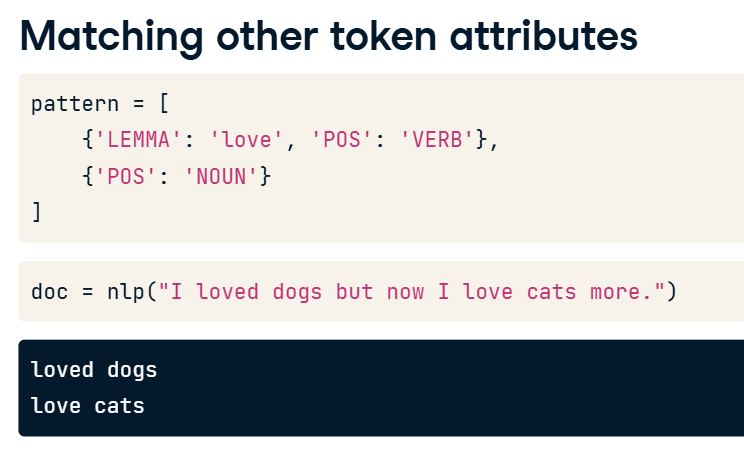

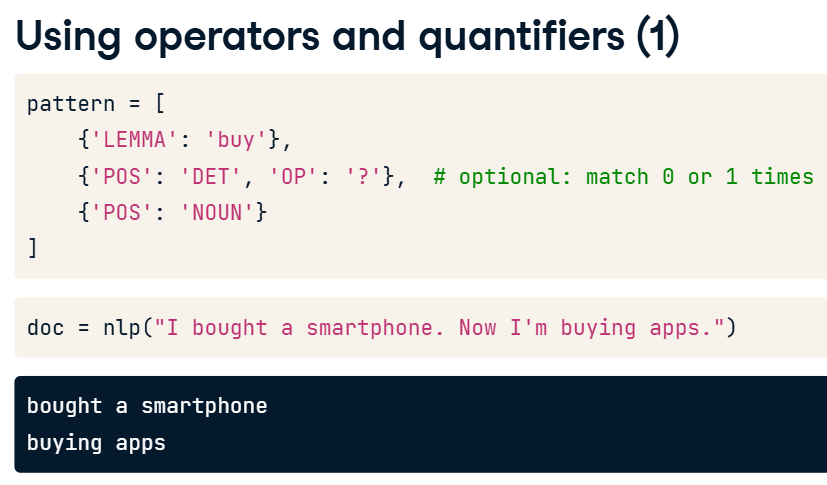

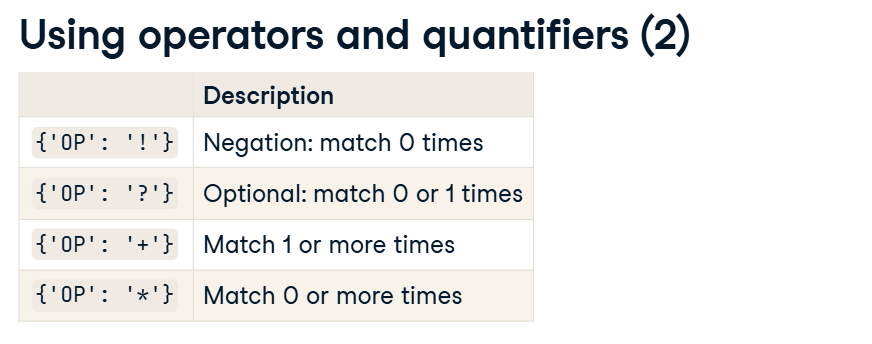

In [8]:
doc = nlp("i downloaded Fortnite on my laptop and can't open the game at all. Help? so when I was downloading Minecraft, I got the Windows version where it is the '.zip' folder and I used the default program to unpack it... do I also need to download Winzip?")

# Write a pattern that matches a form of "download" plus proper noun
pattern = [[{'LEMMA': 'download'}, {'POS': 'PROPN'}]]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('DOWNLOAD_THINGS_PATTERN', pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 3
Match found: downloaded Fortnite
Match found: downloading Minecraft
Match found: download Winzip


In [9]:
doc = nlp("Features of the app include a beautiful design, smart search, automatic labels and optional voice responses.")

# Write a pattern for adjective plus one or two nouns
pattern = [[{'POS': 'ADJ'}, {'POS': 'NOUN', 'OP': '+'}]]
# pattern = [[{'POS': 'ADJ'}, {'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '*'}]]
# Add the pattern to the matcher and apply the matcher to the doc
matcher.add('ADJ_NOUN_PATTERN', pattern)
matches = matcher(doc)
print('Total matches found:', len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
    print('Match found:', doc[start:end].text)

Total matches found: 5
Match found: beautiful design
Match found: smart search
Match found: automatic labels
Match found: optional voice
Match found: optional voice responses


## Data Structures

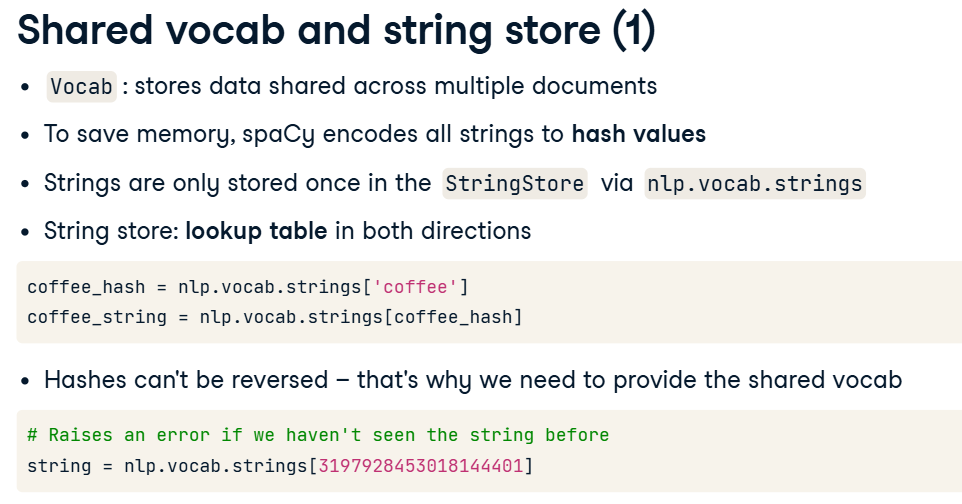

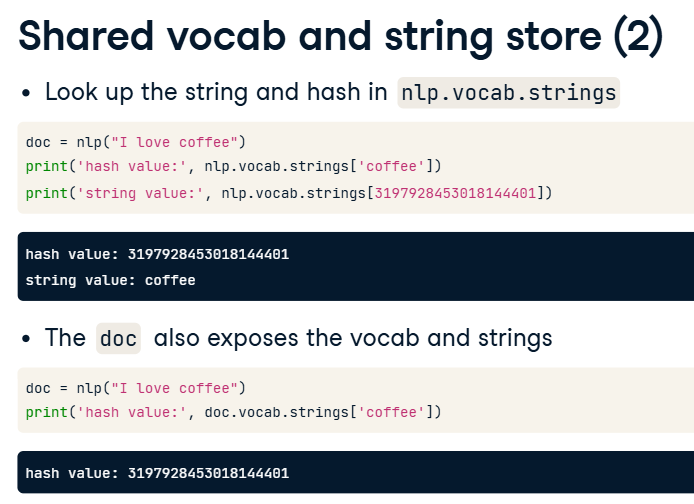

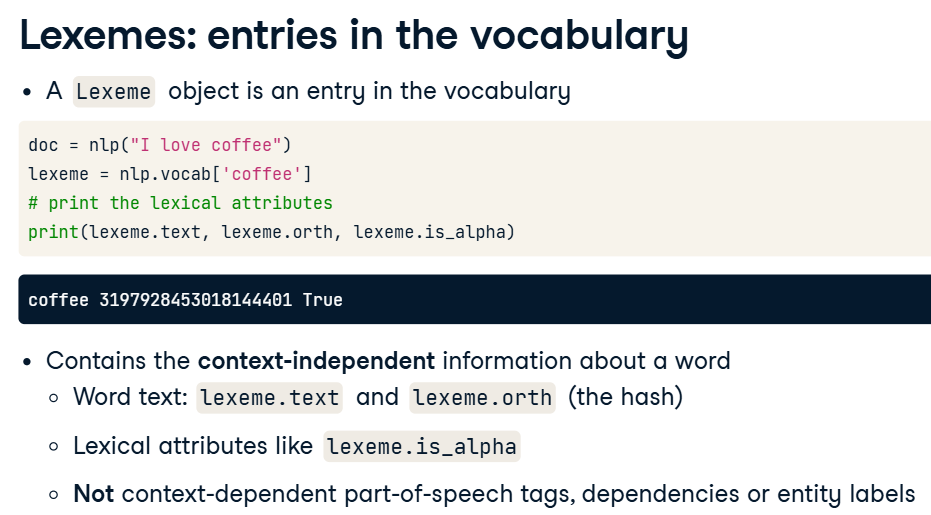

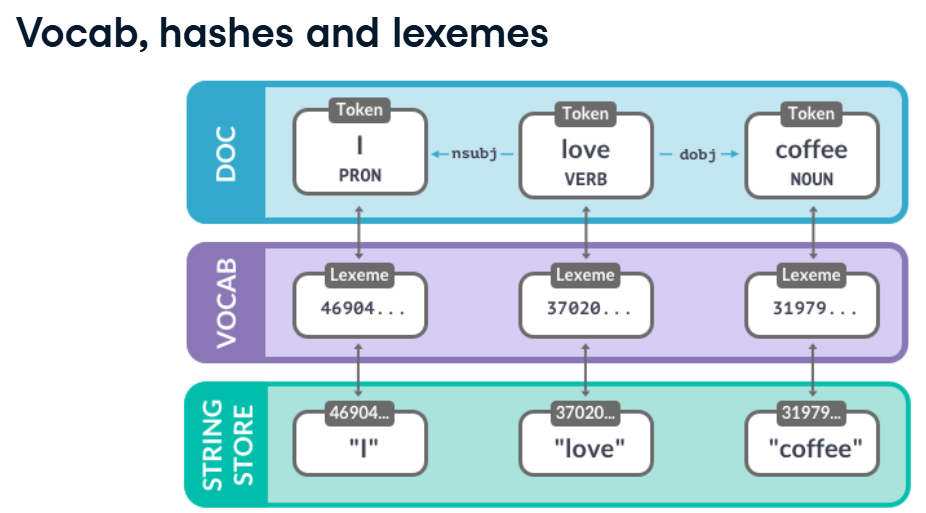

## Data Structures 2

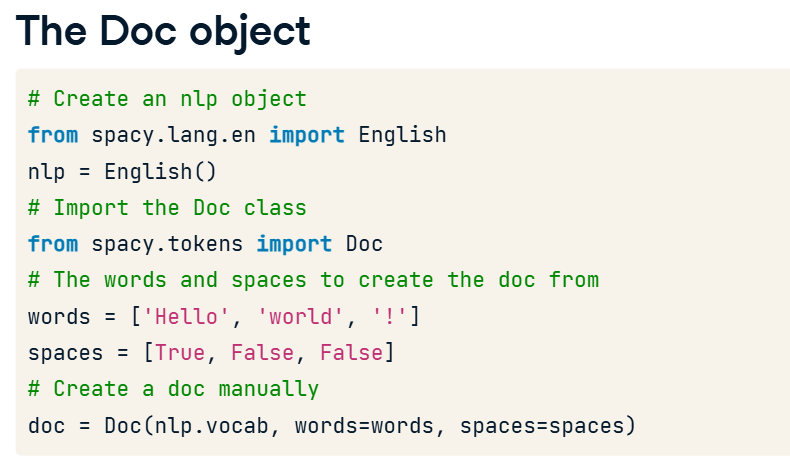

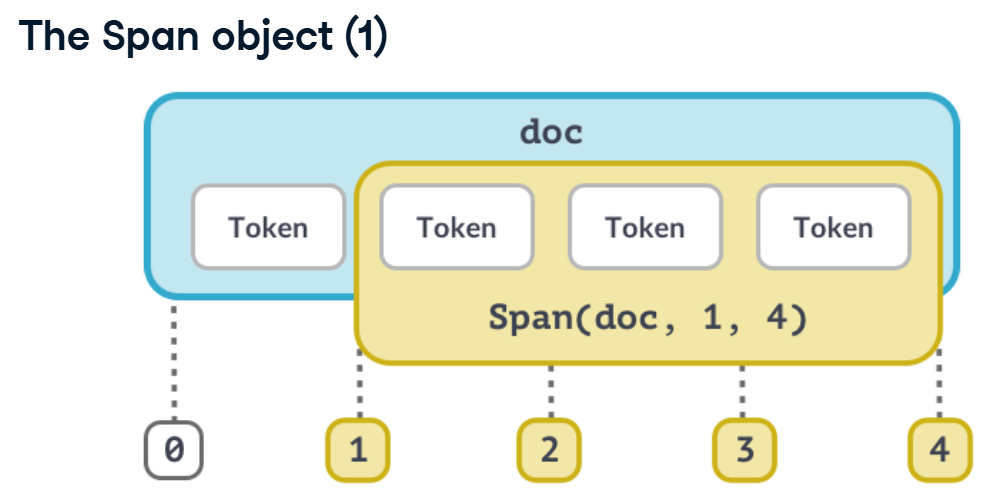

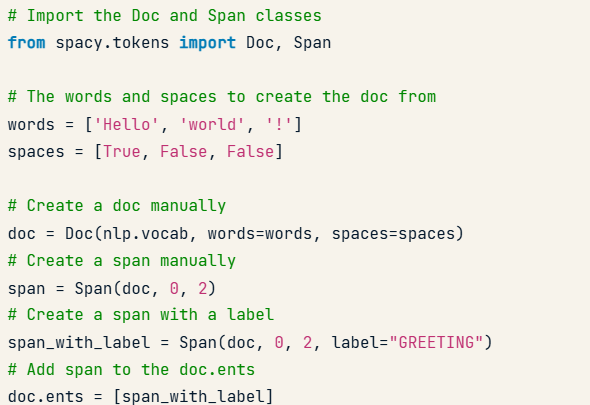

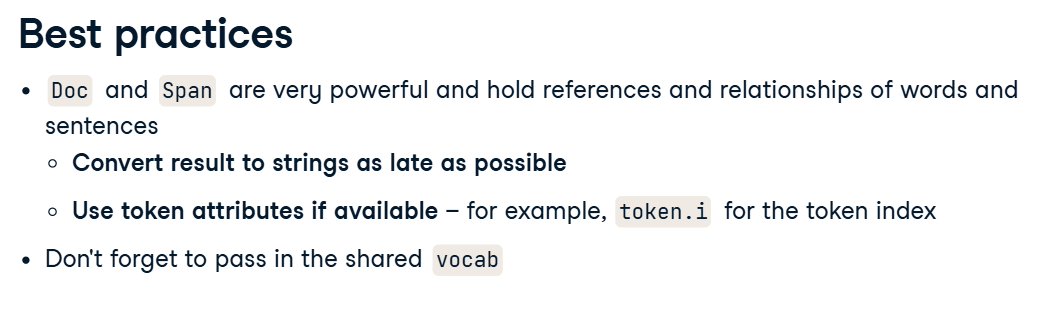

In [10]:
# Import the Doc class
from spacy.tokens import Doc

# Desired text: "spaCy is cool!"
words = ['spaCy', 'is', 'cool', '!']
spaces = [True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

spaCy is cool!


In [11]:
# Import the Doc class
from spacy.tokens import Doc

# Desired text: "Go, get started!"
words = ['Go', ',', 'get', 'started', '!']
spaces = [False, True, True, False, False]

# Create a Doc from the words and spaces
doc = Doc(nlp.vocab, words=words, spaces=spaces)
print(doc.text)

Go, get started!


In [12]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=['I', 'like', 'David', 'Bowie'], spaces=[True, True, True, False])

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label="PERSON")
print(span.text, span.label_)

David Bowie PERSON


In [13]:
# Import the Doc and Span classes
from spacy.tokens import Doc, Span

# Create a doc from the words and spaces
doc = Doc(nlp.vocab, words=['I', 'like', 'David', 'Bowie'], spaces=[True, True, True, False])

# Create a span for "David Bowie" from the doc and assign it the label "PERSON"
span = Span(doc, 2, 4, label='PERSON')

# Add the span to the doc's entities
doc.ents = [span]

# Print entities' text and labels
print([(ent.text, ent.label_) for ent in doc.ents])

[('David Bowie', 'PERSON')]


In [14]:
# less efficient code

# Get all tokens and part-of-speech tags
pos_tags = [token.pos_ for token in doc]

for index, pos in enumerate(pos_tags):
    # Check if the current token is a proper noun
    if pos == 'PROPN':
        # Check if the next token is a verb
        if pos_tags[index + 1] == 'VERB':
            print('Found a verb after a proper noun!')


In [15]:

# efficient code

for token in doc:
    if token.pos_ == 'PROPN':
        if doc[token.i + 1].pos_ == 'VERB':
            print('Found a verb after a proper noun!')


## Word Vectors and Similarity

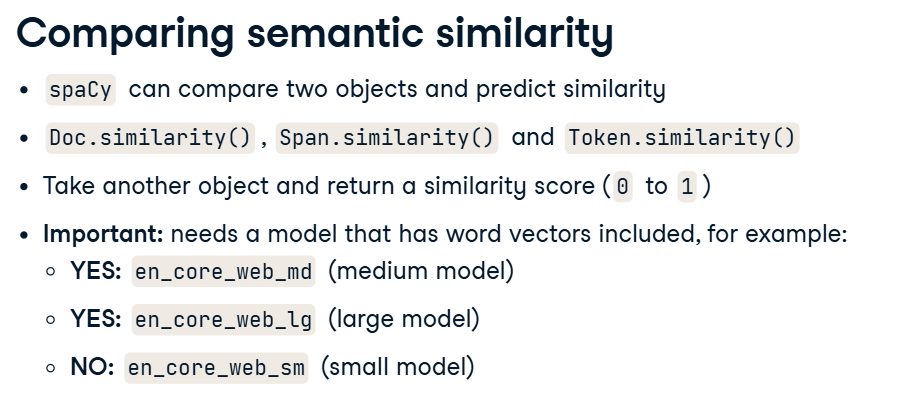

In [16]:
nlp = spacy.load('en_core_web_lg')

# compare two documents
doc1 = nlp("I like fast food.")
doc2 = nlp("I like pizza.")

print(doc1.similarity(doc2))

0.9008087179871952


In [17]:
# compare two tokens
doc = nlp("I like pizza and pasta")

print(doc[2].similarity(doc[4]))

0.6850197911262512


In [18]:
# compare the similarity between colombo and sri lanka
doc = nlp("Colombo is the capital of SriLanka")
token1 = doc[0]
token2 = doc[-1]

print(token1.similarity(token2))

0.48048800230026245


In [19]:
# compare a document with token
doc = nlp("I like pizza")
token = nlp("soap")[0]

print(doc.similarity(token))

0.18213694934365615


In [20]:
# compare span with a document
span = nlp("I like pizza and pasta")[2:5]
doc = nlp("McDonalds sells burgers")

print(span.similarity(doc))

0.4989228481300328


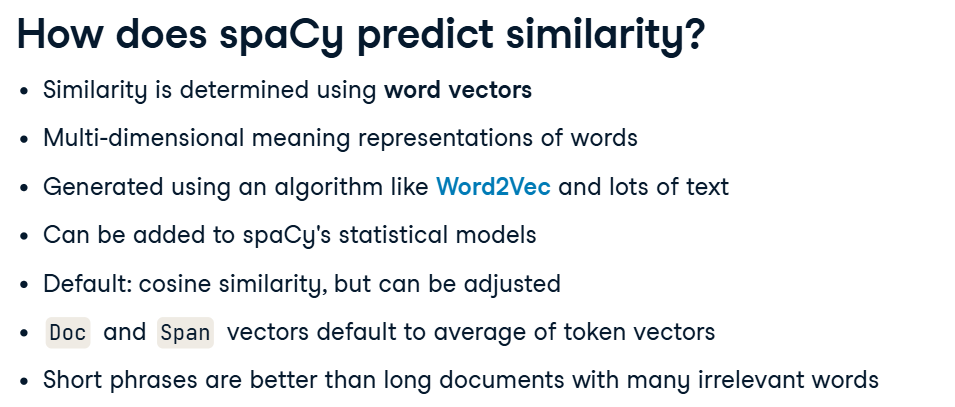

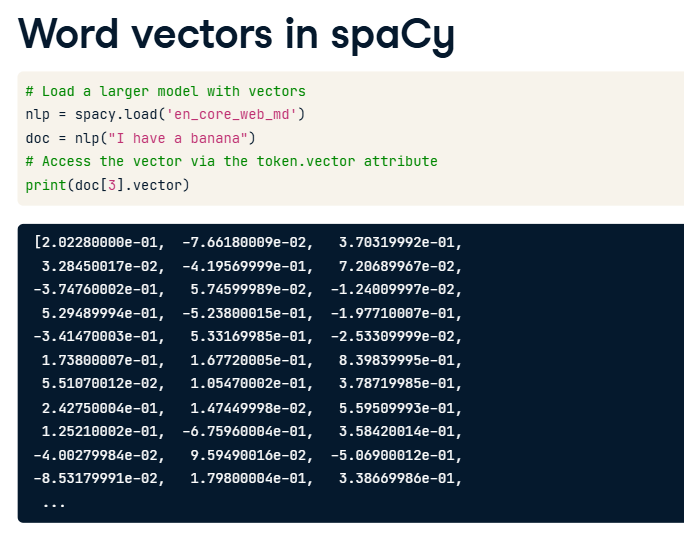

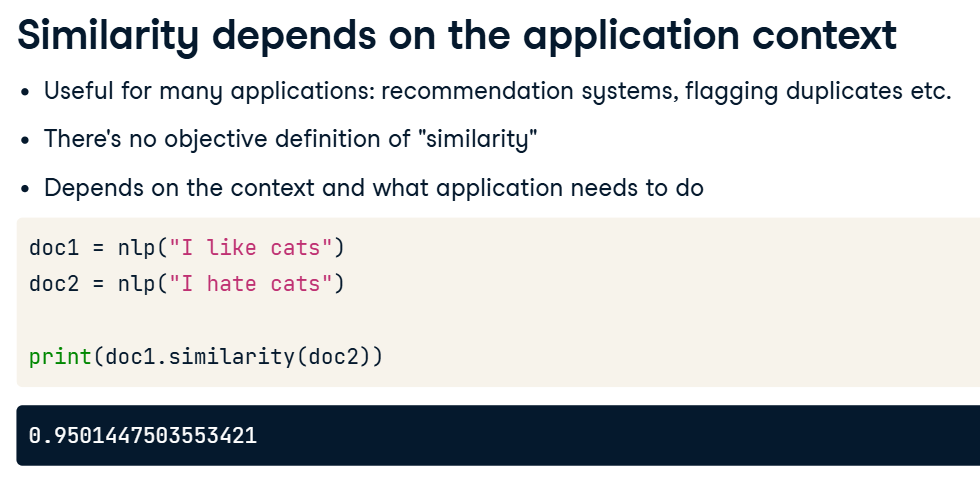

- Gave a high similarity bcz the in both senetences the sentiment is about cats

## Combining models and rules

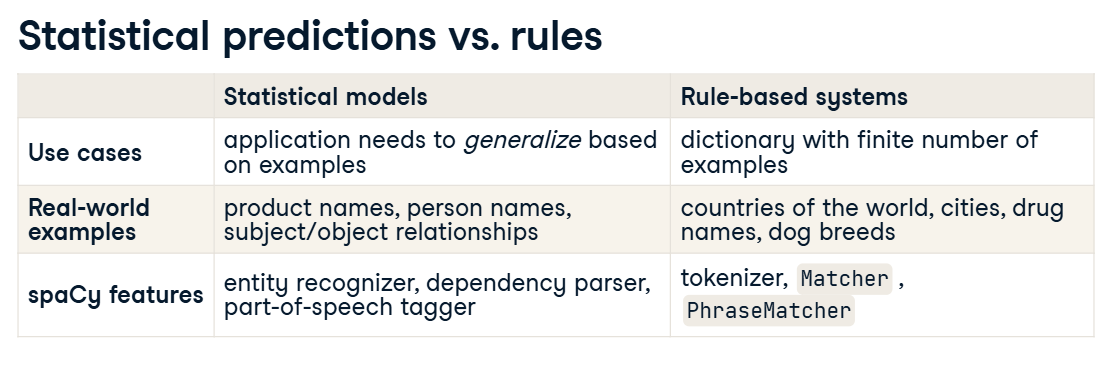

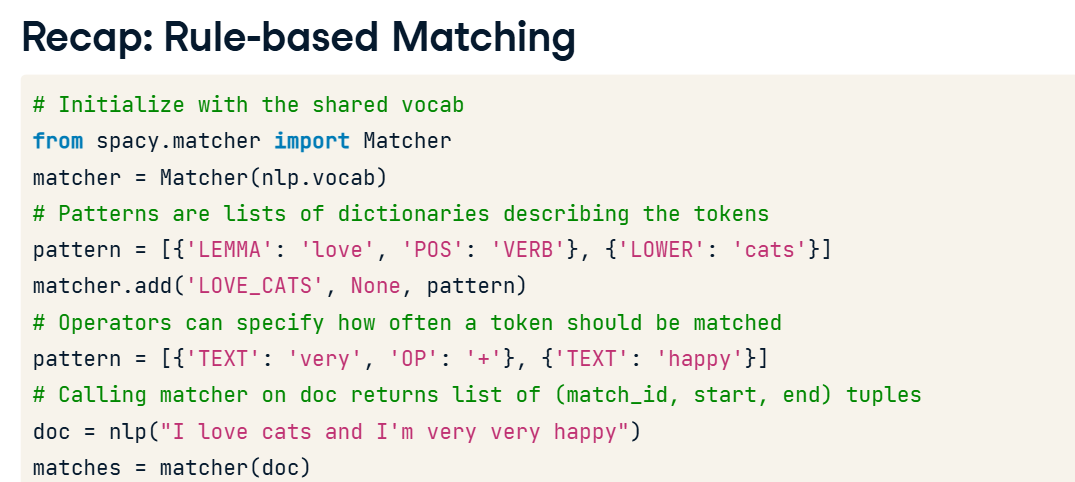

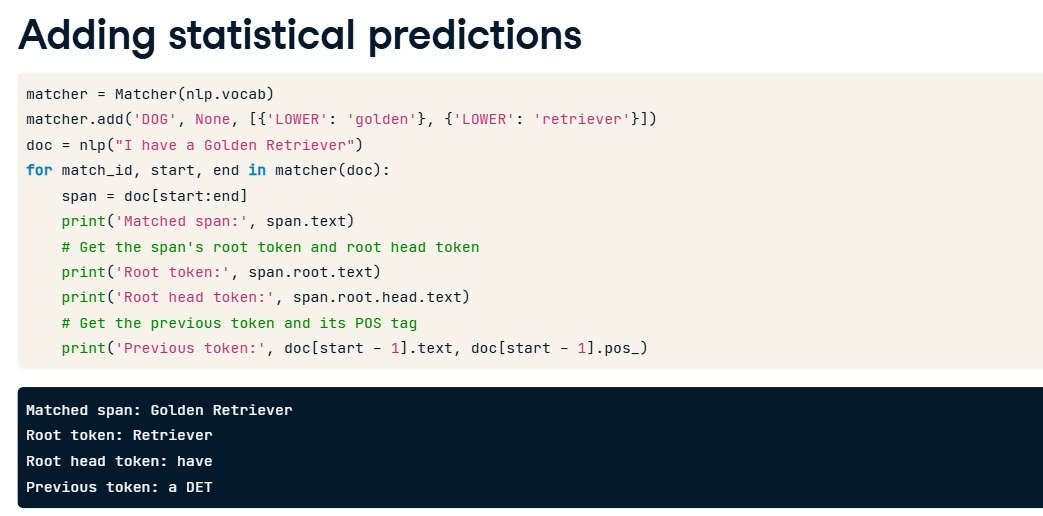

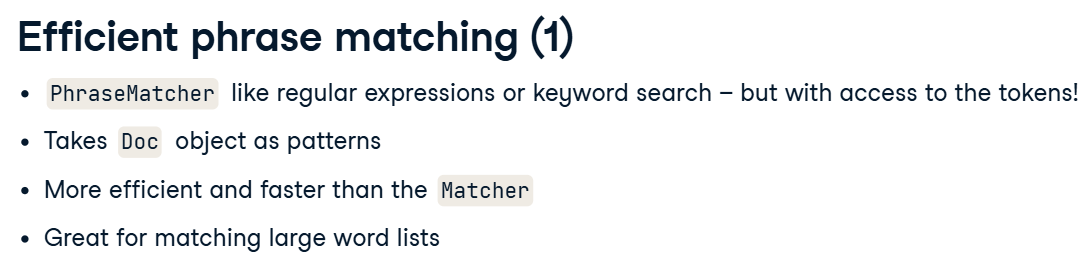

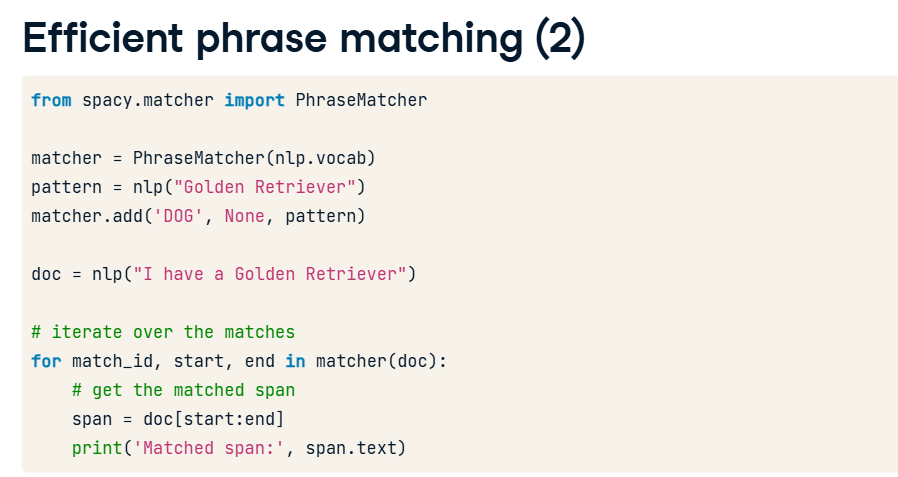

In [21]:
doc = nlp("Twitch Prime, the perks program for Amazon Prime members offering free loot, games and other benefits, is ditching one of its best features: ad-free viewing. According to an email sent out to Amazon Prime members today, ad-free viewing will no longer be included as a part of Twitch Prime for new members, beginning on September 14. However, members with existing annual subscriptions will be able to continue to enjoy ad-free viewing until their subscription comes up for renewal. Those with monthly subscriptions will have access to ad-free viewing until October 15.")

"""Edit pattern1 so that it correctly matches all case-insensitive mentions of "Amazon" plus a title-cased proper noun.
Edit pattern2 so that it correctly matches all case-insensitive mentions of "ad-free", plus the following noun."""

# Create the match patterns
pattern1 = [[{'LOWER': 'amazon'}, {'IS_TITLE': True, 'POS': 'PROPN'}]]
pattern2 = [[{'LOWER': 'ad'}, {'TEXT': '-'}, {'LOWER': 'free'}, {'POS': 'NOUN'}]]

# Initialize the Matcher and add the patterns
matcher = Matcher(nlp.vocab)
matcher.add('PATTERN1', pattern1)
matcher.add('PATTERN2', pattern2)

# Iterate over the matches
for match_id, start, end in matcher(doc):
    # Print pattern string name and text of matched span
    print(doc.vocab.strings[match_id], doc[start:end].text)

PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN1 Amazon Prime
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing
PATTERN2 ad-free viewing


In [22]:
COUNTRIES = ['Afghanistan',
 'Åland Islands',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Anguilla',
 'Antarctica',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Bolivia (Plurinational State of)',
 'Bonaire, Sint Eustatius and Saba',
 'Bosnia and Herzegovina',
 'Botswana',
 'Bouvet Island',
 'Brazil',
 'British Indian Ocean Territory',
 'United States Minor Outlying Islands',
 'Virgin Islands (British)',
 'Virgin Islands (U.S.)',
 'Brunei Darussalam',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cabo Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Christmas Island',
 'Cocos (Keeling) Islands',
 'Colombia',
 'Comoros',
 'Congo',
 'Congo (Democratic Republic of the)',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curaçao',
 'Cyprus',
 'Czech Republic',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Islands (Malvinas)',
 'Faroe Islands',
 'Fiji',
 'Finland',
 'France',
 'French Guiana',
 'French Polynesia',
 'French Southern Territories',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Gibraltar',
 'Greece',
 'Greenland',
 'Grenada',
 'Guadeloupe',
 'Guam',
 'Guatemala',
 'Guernsey',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Heard Island and McDonald Islands',
 'Holy See',
 'Honduras',
 'Hong Kong',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 "Côte d'Ivoire",
 'Iran (Islamic Republic of)',
 'Iraq',
 'Ireland',
 'Isle of Man',
 'Israel',
 'Italy',
 'Jamaica',
 'Japan',
 'Jersey',
 'Jordan',
 'Kazakhstan',
 'Kenya',
 'Kiribati',
 'Kuwait',
 'Kyrgyzstan',
 "Lao People's Democratic Republic",
 'Latvia',
 'Lebanon',
 'Lesotho',
 'Liberia',
 'Libya',
 'Liechtenstein',
 'Lithuania',
 'Luxembourg',
 'Macao',
 'Macedonia (the former Yugoslav Republic of)',
 'Madagascar',
 'Malawi',
 'Malaysia',
 'Maldives',
 'Mali',
 'Malta',
 'Marshall Islands',
 'Martinique',
 'Mauritania',
 'Mauritius',
 'Mayotte',
 'Mexico',
 'Micronesia (Federated States of)',
 'Moldova (Republic of)',
 'Monaco',
 'Mongolia',
 'Montenegro',
 'Montserrat',
 'Morocco',
 'Mozambique',
 'Myanmar',
 'Namibia',
 'Nauru',
 'Nepal',
 'Netherlands',
 'New Caledonia',
 'New Zealand',
 'Nicaragua',
 'Niger',
 'Nigeria',
 'Niue',
 'Norfolk Island',
 "Korea (Democratic People's Republic of)",
 'Northern Mariana Islands',
 'Norway',
 'Oman',
 'Pakistan',
 'Palau',
 'Palestine, State of',
 'Panama',
 'Papua New Guinea',
 'Paraguay',
 'Peru',
 'Philippines',
 'Pitcairn',
 'Poland',
 'Portugal',
 'Puerto Rico',
 'Qatar',
 'Republic of Kosovo',
 'Réunion',
 'Romania',
 'Russian Federation',
 'Rwanda',
 'Saint Barthélemy',
 'Saint Helena, Ascension and Tristan da Cunha',
 'Saint Kitts and Nevis',
 'Saint Lucia',
 'Saint Martin (French part)',
 'Saint Pierre and Miquelon',
 'Saint Vincent and the Grenadines',
 'Samoa',
 'San Marino',
 'Sao Tome and Principe',
 'Saudi Arabia',
 'Senegal',
 'Serbia',
 'Seychelles',
 'Sierra Leone',
 'Singapore',
 'Sint Maarten (Dutch part)',
 'Slovakia',
 'Slovenia',
 'Solomon Islands',
 'Somalia',
 'South Africa',
 'South Georgia and the South Sandwich Islands',
 'Korea (Republic of)',
 'South Sudan',
 'Spain',
 'Sri Lanka',
 'Sudan',
 'Suriname',
 'Svalbard and Jan Mayen',
 'Swaziland',
 'Sweden',
 'Switzerland',
 'Syrian Arab Republic',
 'Taiwan',
 'Tajikistan',
 'Tanzania, United Republic of',
 'Thailand',
 'Timor-Leste',
 'Togo',
 'Tokelau',
 'Tonga',
 'Trinidad and Tobago',
 'Tunisia',
 'Turkey',
 'Turkmenistan',
 'Turks and Caicos Islands',
 'Tuvalu',
 'Uganda',
 'Ukraine',
 'United Arab Emirates',
 'United Kingdom of Great Britain and Northern Ireland',
 'United States of America',
 'Uruguay',
 'Uzbekistan',
 'Vanuatu',
 'Venezuela (Bolivarian Republic of)',
 'Viet Nam',
 'Wallis and Futuna',
 'Western Sahara',
 'Yemen',
 'Zambia',
 'Zimbabwe']

In [23]:
doc = nlp("Czech Republic may help Slovakia protect its airspace")

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

# Create pattern Doc objects and add them to the matcher
# This is the faster version of: [nlp(country) for country in COUNTRIES]
patterns = list(nlp.pipe(COUNTRIES))
matcher.add('COUNTRY', None, *patterns)

# Call the matcher on the test document and print the result
matches = matcher(doc)
print([doc[start:end] for match_id, start, end in matches])

[Czech Republic, Slovakia]


## Processing Pipelines

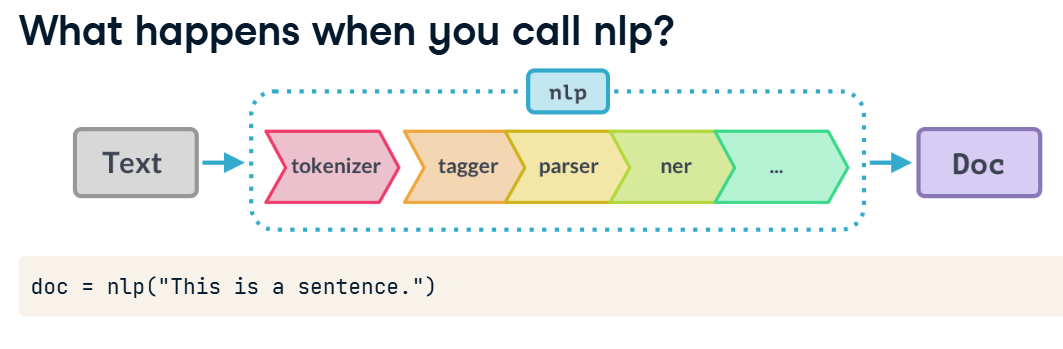

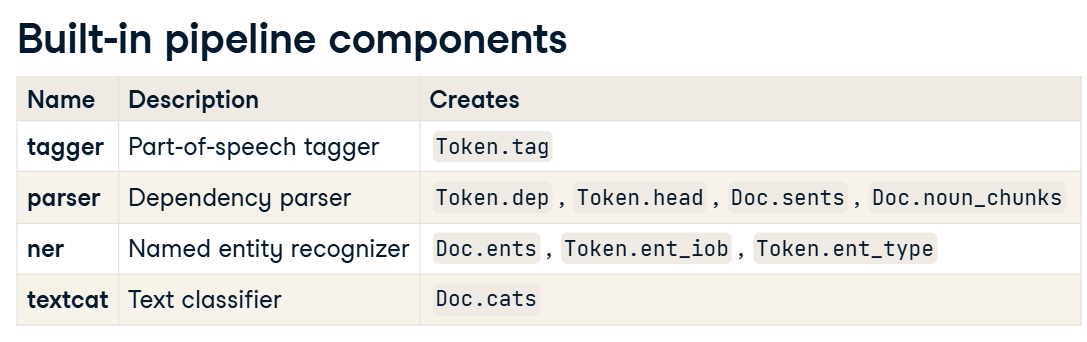

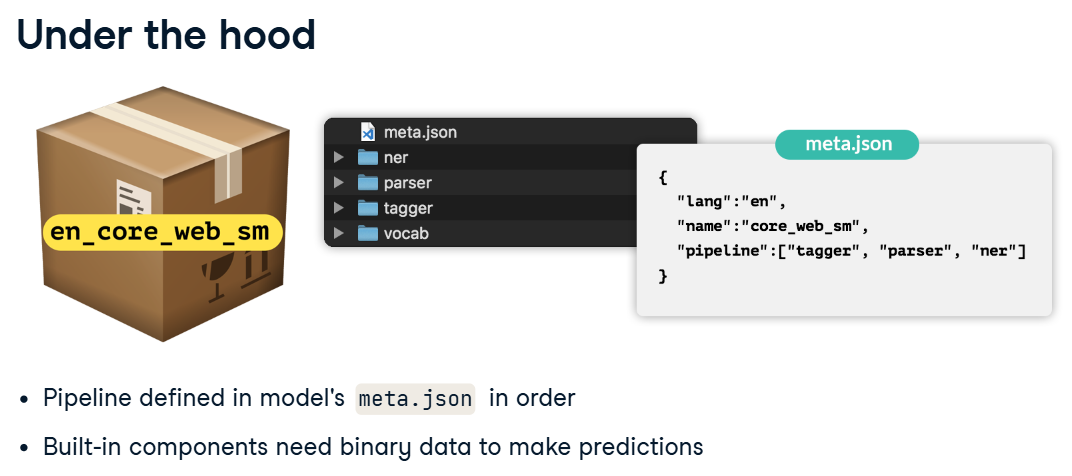

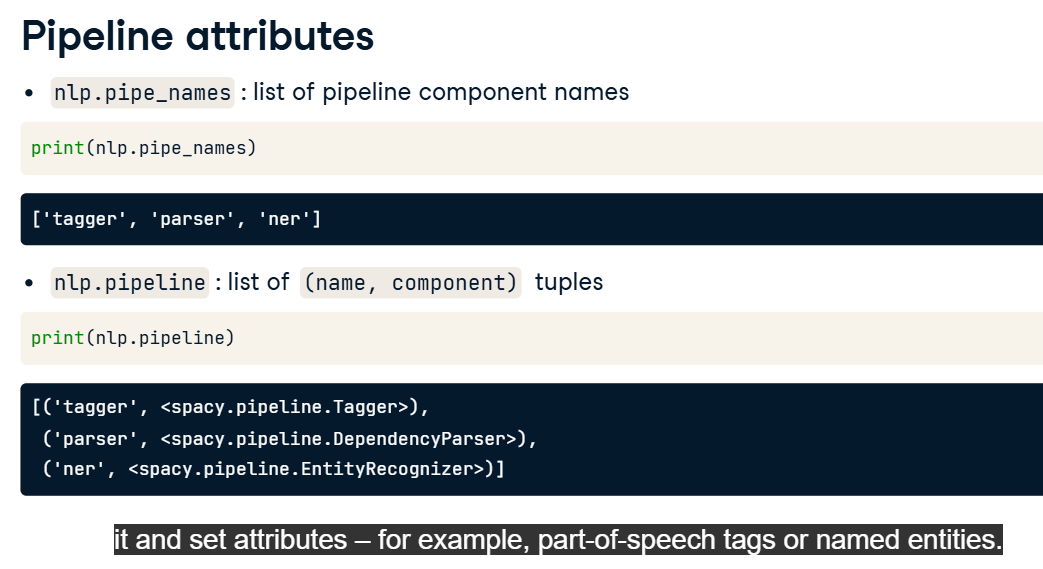

## Custom Pipeline components

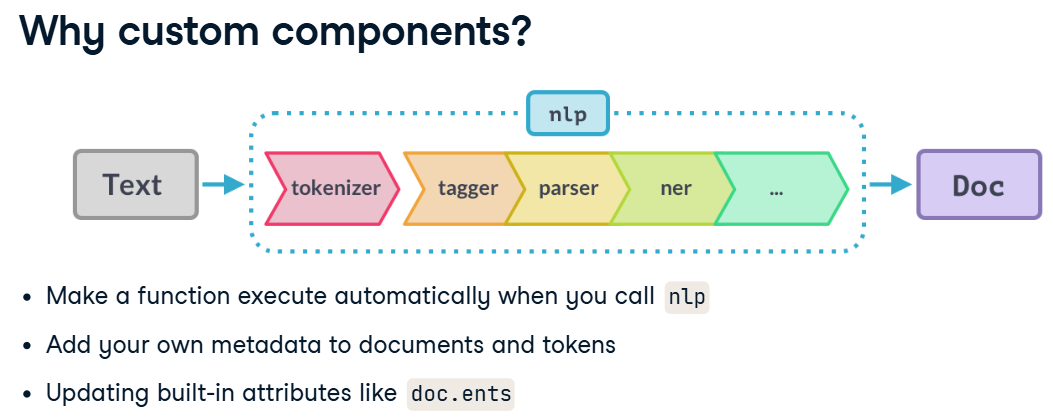

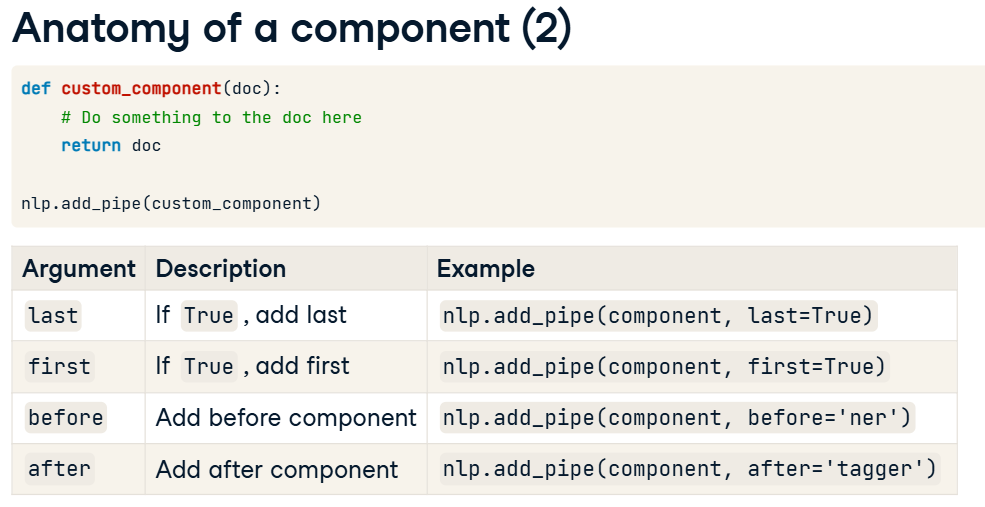

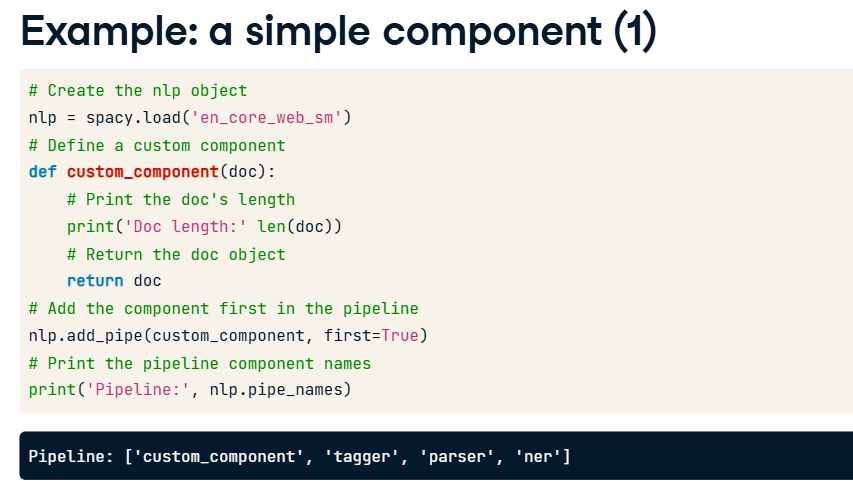

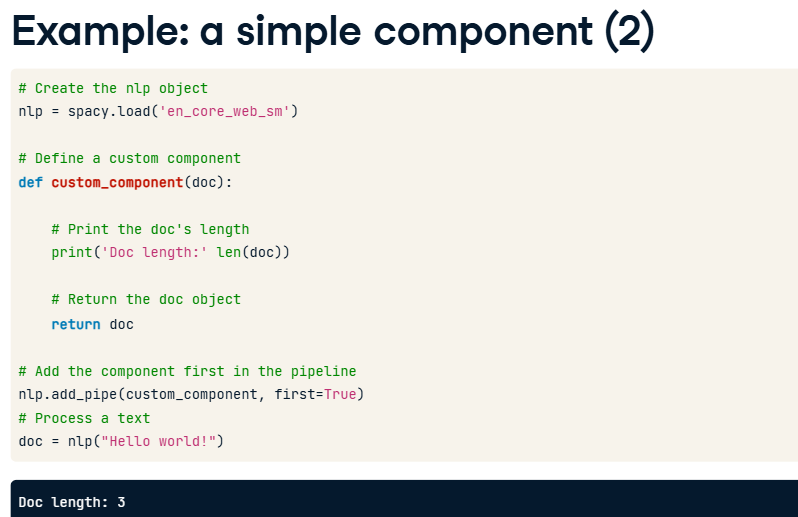

Use cases for custom components
Which of these problems can be solved by custom pipeline components? Choose all that apply!

- 1.updating the pre-trained models and improving their predictions
- 2.computing your own values based on tokens and their attributes
- 3.adding named entities, for example based on a dictionary
- 4.implementing support for an additional language

Answer 2,3

In [24]:
animal_patterns = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]

# Import the PhraseMatcher and initialize it
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

patterns = list(nlp.pipe(animal_patterns))
matcher.add('ANIMALS', None, *patterns)

In [25]:
from spacy.language import Language

# Define the custom component
@Language.component("animal_component")
def animal_component(doc):
    # Apply the matcher to the doc
    matches = matcher(doc)
    # Create a Span for each match and assign the label 'ANIMAL'
    spans = [Span(doc, start, end, label='ANIMAL')
             for match_id, start, end in matches]
    # Overwrite the doc.ents with the matched spans
    doc.ents = spans
    return doc

# Add the component to the pipeline after the 'ner' component 
nlp.add_pipe("animal_component", name='custom_ner',after='ner')
print(nlp.pipe_names)

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner', 'custom_ner']


In [26]:
# Process the text and print the text and label for the doc.ents
doc = nlp("I have a cat and a Golden Retriever")
print([(ent.text, ent.label_) for ent in doc.ents])

[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


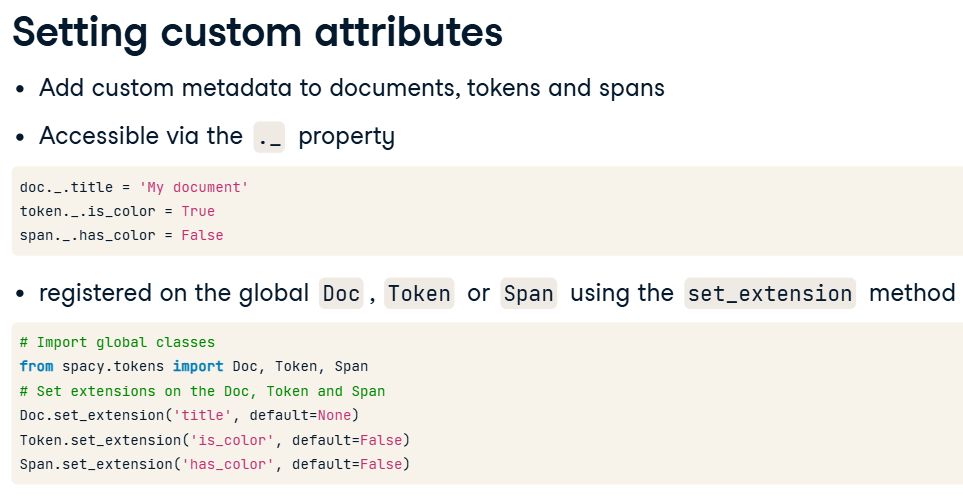

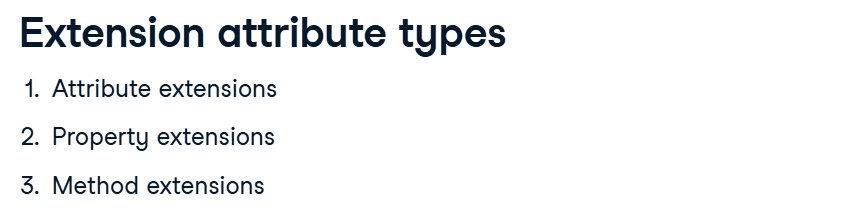

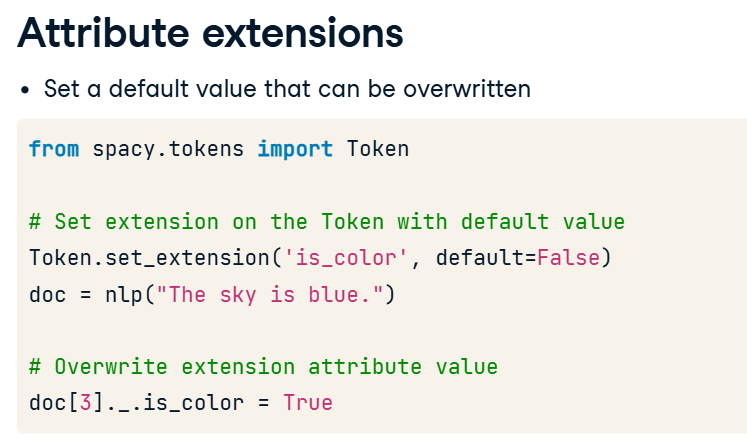

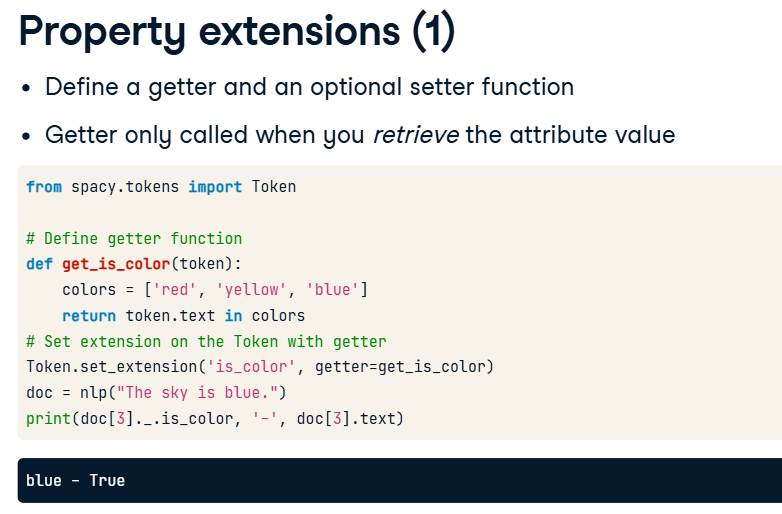

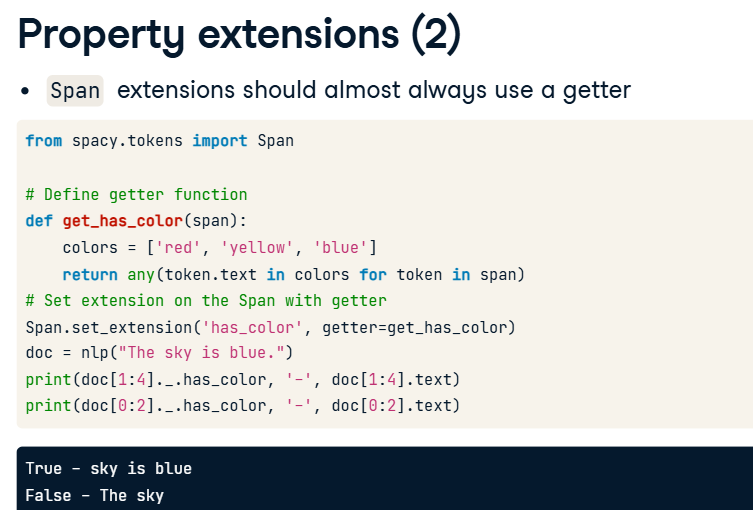

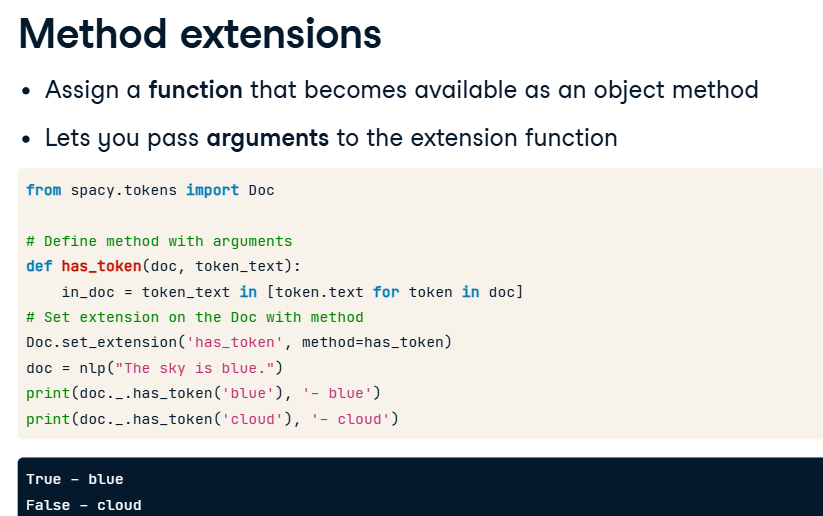

In [27]:
from spacy.tokens import Doc , Span , Token

# Register the Token extension attribute 'is_country' with the default value False
Token.set_extension('is_country', default=False)

# Process the text and set the is_country attribute to True for the token "Spain"
doc = nlp("I live in Spain.")
doc[3]._.is_country = True

# Print the token text and the is_country attribute for all tokens
print([(token.text, token._.is_country) for token in doc])

[('I', False), ('live', False), ('in', False), ('Spain', True), ('.', False)]


In [28]:
# Define the getter function that takes a token and returns its reversed text
def get_reversed(token):
    return token.text[::-1]
  
# Register the Token property extension 'reversed' with the getter get_reversed
Token.set_extension('reversed', getter=get_reversed)

# Process the text and print the reversed attribute for each token
doc = nlp("All generalizations are false, including this one.")
for token in doc:
    print('reversed:', token._.reversed)

reversed: llA
reversed: snoitazilareneg
reversed: era
reversed: eslaf
reversed: ,
reversed: gnidulcni
reversed: siht
reversed: eno
reversed: .


In [29]:
# Define the getter function
def get_has_number(doc):
    # Return if any of the tokens in the doc return True for token.like_num
    return any(token.like_num for token in doc)

# Register the Doc property extension 'has_number' with the getter get_has_number
Doc.set_extension('has_number', getter=get_has_number)

# Process the text and check the custom has_number attribute 
doc = nlp("The museum closed for five years in 2012.")
print('has_number:', doc._.has_number)

has_number: True


In [30]:
# Define the method
def to_html(span, tag):
    # Wrap the span text in a HTML tag and return it
    return '<{tag}>{text}</{tag}>'.format(tag=tag, text=span.text)

# Register the Span property extension 'to_html' with the method to_html
Span.set_extension('to_html', method=to_html)

# Process the text and call the to_html method on the span with the tag name 'strong'
doc = nlp("Hello world, this is a sentence.")
span = doc[0:2]
print(span._.to_html('strong'))

<strong>Hello world</strong>


In [31]:
def get_wikipedia_url(span):
    # Get a Wikipedia URL if the span has one of the labels
    if span.label_ in ('PERSON', 'ORG', 'GPE', 'LOCATION'):
        entity_text = span.text.replace(' ', '_')
        return "https://en.wikipedia.org/w/index.php?search=" + entity_text

# Set the Span extension wikipedia_url using get getter get_wikipedia_url
Span.set_extension('wikipedia_url', getter=get_wikipedia_url)

doc = nlp("In over fifty years from his very first recordings right through to his last album, David Bowie was at the vanguard of contemporary culture.")
for ent in doc.ents:
    # Print the text and Wikipedia URL of the entity
    print(ent.text, ent._.wikipedia_url)

In [32]:
capitals = {'Afghanistan': 'Kabul',
 'Albania': 'Tirana',
 'Algeria': 'Algiers',
 'American Samoa': 'Pago Pago',
 'Andorra': 'Andorra la Vella',
 'Angola': 'Luanda',
 'Anguilla': 'The Valley',
 'Antarctica': '',
 'Antigua and Barbuda': "Saint John's",
 'Argentina': 'Buenos Aires',
 'Armenia': 'Yerevan',
 'Aruba': 'Oranjestad',
 'Australia': 'Canberra',
 'Austria': 'Vienna',
 'Azerbaijan': 'Baku',
 'Bahamas': 'Nassau',
 'Bahrain': 'Manama',
 'Bangladesh': 'Dhaka',
 'Barbados': 'Bridgetown',
 'Belarus': 'Minsk',
 'Belgium': 'Brussels',
 'Belize': 'Belmopan',
 'Benin': 'Porto-Novo',
 'Bermuda': 'Hamilton',
 'Bhutan': 'Thimphu',
 'Bolivia (Plurinational State of)': 'Sucre',
 'Bonaire, Sint Eustatius and Saba': 'Kralendijk',
 'Bosnia and Herzegovina': 'Sarajevo',
 'Botswana': 'Gaborone',
 'Bouvet Island': '',
 'Brazil': 'Brasília',
 'British Indian Ocean Territory': 'Diego Garcia',
 'Brunei Darussalam': 'Bandar Seri Begawan',
 'Bulgaria': 'Sofia',
 'Burkina Faso': 'Ouagadougou',
 'Burundi': 'Bujumbura',
 'Cabo Verde': 'Praia',
 'Cambodia': 'Phnom Penh',
 'Cameroon': 'Yaoundé',
 'Canada': 'Ottawa',
 'Cayman Islands': 'George Town',
 'Central African Republic': 'Bangui',
 'Chad': "N'Djamena",
 'Chile': 'Santiago',
 'China': 'Beijing',
 'Christmas Island': 'Flying Fish Cove',
 'Cocos (Keeling) Islands': 'West Island',
 'Colombia': 'Bogotá',
 'Comoros': 'Moroni',
 'Congo': 'Brazzaville',
 'Congo (Democratic Republic of the)': 'Kinshasa',
 'Cook Islands': 'Avarua',
 'Costa Rica': 'San José',
 'Croatia': 'Zagreb',
 'Cuba': 'Havana',
 'Curaçao': 'Willemstad',
 'Cyprus': 'Nicosia',
 'Czech Republic': 'Prague',
 "Côte d'Ivoire": 'Yamoussoukro',
 'Denmark': 'Copenhagen',
 'Djibouti': 'Djibouti',
 'Dominica': 'Roseau',
 'Dominican Republic': 'Santo Domingo',
 'Ecuador': 'Quito',
 'Egypt': 'Cairo',
 'El Salvador': 'San Salvador',
 'Equatorial Guinea': 'Malabo',
 'Eritrea': 'Asmara',
 'Estonia': 'Tallinn',
 'Ethiopia': 'Addis Ababa',
 'Falkland Islands (Malvinas)': 'Stanley',
 'Faroe Islands': 'Tórshavn',
 'Fiji': 'Suva',
 'Finland': 'Helsinki',
 'France': 'Paris',
 'French Guiana': 'Cayenne',
 'French Polynesia': 'Papeetē',
 'French Southern Territories': 'Port-aux-Français',
 'Gabon': 'Libreville',
 'Gambia': 'Banjul',
 'Georgia': 'Tbilisi',
 'Germany': 'Berlin',
 'Ghana': 'Accra',
 'Gibraltar': 'Gibraltar',
 'Greece': 'Athens',
 'Greenland': 'Nuuk',
 'Grenada': "St. George's",
 'Guadeloupe': 'Basse-Terre',
 'Guam': 'Hagåtña',
 'Guatemala': 'Guatemala City',
 'Guernsey': 'St. Peter Port',
 'Guinea': 'Conakry',
 'Guinea-Bissau': 'Bissau',
 'Guyana': 'Georgetown',
 'Haiti': 'Port-au-Prince',
 'Heard Island and McDonald Islands': '',
 'Holy See': 'Rome',
 'Honduras': 'Tegucigalpa',
 'Hong Kong': 'City of Victoria',
 'Hungary': 'Budapest',
 'Iceland': 'Reykjavík',
 'India': 'New Delhi',
 'Indonesia': 'Jakarta',
 'Iran (Islamic Republic of)': 'Tehran',
 'Iraq': 'Baghdad',
 'Ireland': 'Dublin',
 'Isle of Man': 'Douglas',
 'Israel': 'Jerusalem',
 'Italy': 'Rome',
 'Jamaica': 'Kingston',
 'Japan': 'Tokyo',
 'Jersey': 'Saint Helier',
 'Jordan': 'Amman',
 'Kazakhstan': 'Astana',
 'Kenya': 'Nairobi',
 'Kiribati': 'South Tarawa',
 "Korea (Democratic People's Republic of)": 'Pyongyang',
 'Korea (Republic of)': 'Seoul',
 'Kuwait': 'Kuwait City',
 'Kyrgyzstan': 'Bishkek',
 "Lao People's Democratic Republic": 'Vientiane',
 'Latvia': 'Riga',
 'Lebanon': 'Beirut',
 'Lesotho': 'Maseru',
 'Liberia': 'Monrovia',
 'Libya': 'Tripoli',
 'Liechtenstein': 'Vaduz',
 'Lithuania': 'Vilnius',
 'Luxembourg': 'Luxembourg',
 'Macao': '',
 'Macedonia (the former Yugoslav Republic of)': 'Skopje',
 'Madagascar': 'Antananarivo',
 'Malawi': 'Lilongwe',
 'Malaysia': 'Kuala Lumpur',
 'Maldives': 'Malé',
 'Mali': 'Bamako',
 'Malta': 'Valletta',
 'Marshall Islands': 'Majuro',
 'Martinique': 'Fort-de-France',
 'Mauritania': 'Nouakchott',
 'Mauritius': 'Port Louis',
 'Mayotte': 'Mamoudzou',
 'Mexico': 'Mexico City',
 'Micronesia (Federated States of)': 'Palikir',
 'Moldova (Republic of)': 'Chișinău',
 'Monaco': 'Monaco',
 'Mongolia': 'Ulan Bator',
 'Montenegro': 'Podgorica',
 'Montserrat': 'Plymouth',
 'Morocco': 'Rabat',
 'Mozambique': 'Maputo',
 'Myanmar': 'Naypyidaw',
 'Namibia': 'Windhoek',
 'Nauru': 'Yaren',
 'Nepal': 'Kathmandu',
 'Netherlands': 'Amsterdam',
 'New Caledonia': 'Nouméa',
 'New Zealand': 'Wellington',
 'Nicaragua': 'Managua',
 'Niger': 'Niamey',
 'Nigeria': 'Abuja',
 'Niue': 'Alofi',
 'Norfolk Island': 'Kingston',
 'Northern Mariana Islands': 'Saipan',
 'Norway': 'Oslo',
 'Oman': 'Muscat',
 'Pakistan': 'Islamabad',
 'Palau': 'Ngerulmud',
 'Palestine, State of': 'Ramallah',
 'Panama': 'Panama City',
 'Papua New Guinea': 'Port Moresby',
 'Paraguay': 'Asunción',
 'Peru': 'Lima',
 'Philippines': 'Manila',
 'Pitcairn': 'Adamstown',
 'Poland': 'Warsaw',
 'Portugal': 'Lisbon',
 'Puerto Rico': 'San Juan',
 'Qatar': 'Doha',
 'Republic of Kosovo': 'Pristina',
 'Romania': 'Bucharest',
 'Russian Federation': 'Moscow',
 'Rwanda': 'Kigali',
 'Réunion': 'Saint-Denis',
 'Saint Barthélemy': 'Gustavia',
 'Saint Helena, Ascension and Tristan da Cunha': 'Jamestown',
 'Saint Kitts and Nevis': 'Basseterre',
 'Saint Lucia': 'Castries',
 'Saint Martin (French part)': 'Marigot',
 'Saint Pierre and Miquelon': 'Saint-Pierre',
 'Saint Vincent and the Grenadines': 'Kingstown',
 'Samoa': 'Apia',
 'San Marino': 'City of San Marino',
 'Sao Tome and Principe': 'São Tomé',
 'Saudi Arabia': 'Riyadh',
 'Senegal': 'Dakar',
 'Serbia': 'Belgrade',
 'Seychelles': 'Victoria',
 'Sierra Leone': 'Freetown',
 'Singapore': 'Singapore',
 'Sint Maarten (Dutch part)': 'Philipsburg',
 'Slovakia': 'Bratislava',
 'Slovenia': 'Ljubljana',
 'Solomon Islands': 'Honiara',
 'Somalia': 'Mogadishu',
 'South Africa': 'Pretoria',
 'South Georgia and the South Sandwich Islands': 'King Edward Point',
 'South Sudan': 'Juba',
 'Spain': 'Madrid',
 'Sri Lanka': 'Colombo',
 'Sudan': 'Khartoum',
 'Suriname': 'Paramaribo',
 'Svalbard and Jan Mayen': 'Longyearbyen',
 'Swaziland': 'Lobamba',
 'Sweden': 'Stockholm',
 'Switzerland': 'Bern',
 'Syrian Arab Republic': 'Damascus',
 'Taiwan': 'Taipei',
 'Tajikistan': 'Dushanbe',
 'Tanzania, United Republic of': 'Dodoma',
 'Thailand': 'Bangkok',
 'Timor-Leste': 'Dili',
 'Togo': 'Lomé',
 'Tokelau': 'Fakaofo',
 'Tonga': "Nuku'alofa",
 'Trinidad and Tobago': 'Port of Spain',
 'Tunisia': 'Tunis',
 'Turkey': 'Ankara',
 'Turkmenistan': 'Ashgabat',
 'Turks and Caicos Islands': 'Cockburn Town',
 'Tuvalu': 'Funafuti',
 'Uganda': 'Kampala',
 'Ukraine': 'Kiev',
 'United Arab Emirates': 'Abu Dhabi',
 'United Kingdom of Great Britain and Northern Ireland': 'London',
 'United States Minor Outlying Islands': '',
 'United States of America': 'Washington, D.C.',
 'Uruguay': 'Montevideo',
 'Uzbekistan': 'Tashkent',
 'Vanuatu': 'Port Vila',
 'Venezuela (Bolivarian Republic of)': 'Caracas',
 'Viet Nam': 'Hanoi',
 'Virgin Islands (British)': 'Road Town',
 'Virgin Islands (U.S.)': 'Charlotte Amalie',
 'Wallis and Futuna': 'Mata-Utu',
 'Western Sahara': 'El Aaiún',
 'Yemen': "Sana'a",
 'Zambia': 'Lusaka',
 'Zimbabwe': 'Harare',
 'Åland Islands': 'Mariehamn'}

In [33]:
nlp = spacy.load("en_core_web_sm")

In [34]:
# Define the custom component
@Language.component("countries_component")
def countries_component(doc):
    # Create an entity Span with the label 'GPE' for all matches
    doc.ents = [Span(doc, start, end, label='GPE')
                for match_id, start, end in matcher(doc)]
    return doc

# Add the component to the pipeline
nlp.add_pipe("countries_component" , name='countries_match' , last=True)

# Register capital and getter that looks up the span text in country capitals
Span.set_extension('capital', getter=lambda span: capitals.get(span.text))

# Process the text and print the entity text, label and capital attributes
doc = nlp("Czech Republic may help Slovakia protect its airspace")
print([(ent.text, ent.label_, ent._.capital) for ent in doc.ents])

[]


## Scaling and Performance

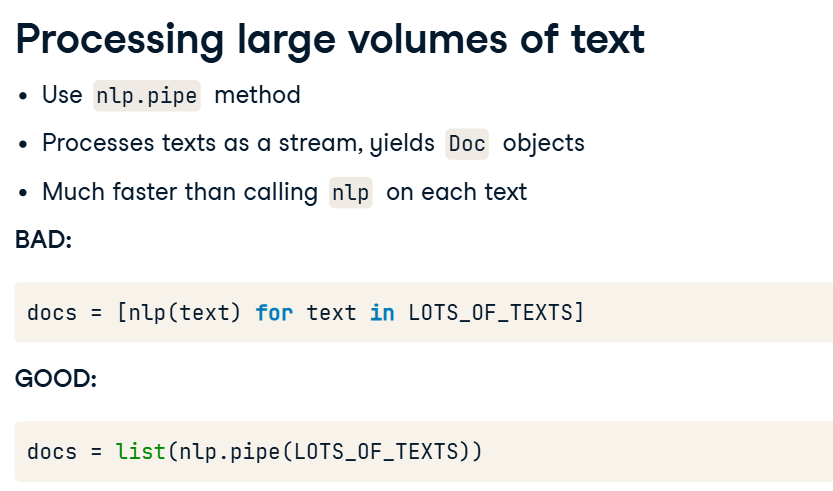

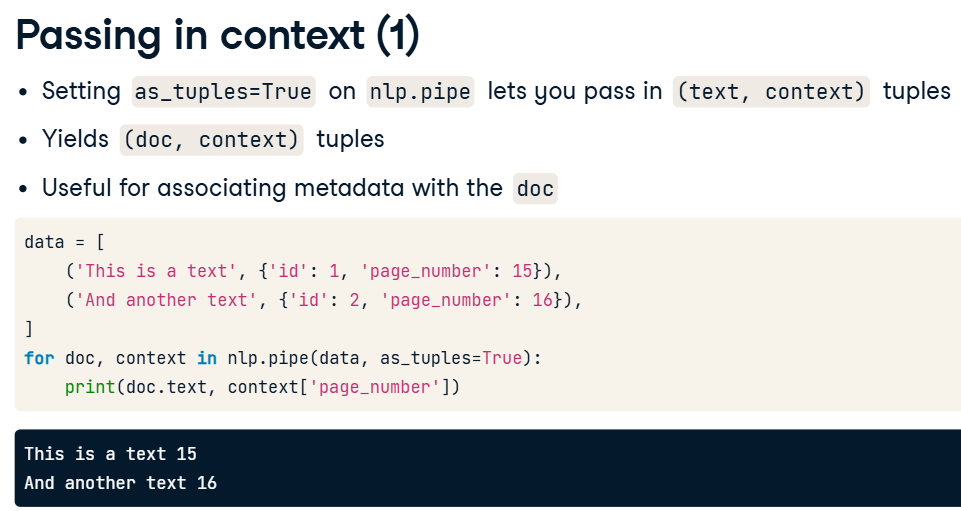

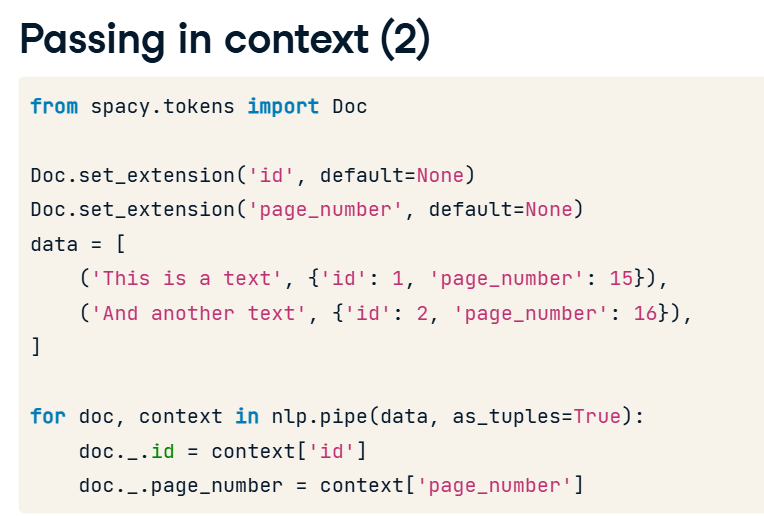

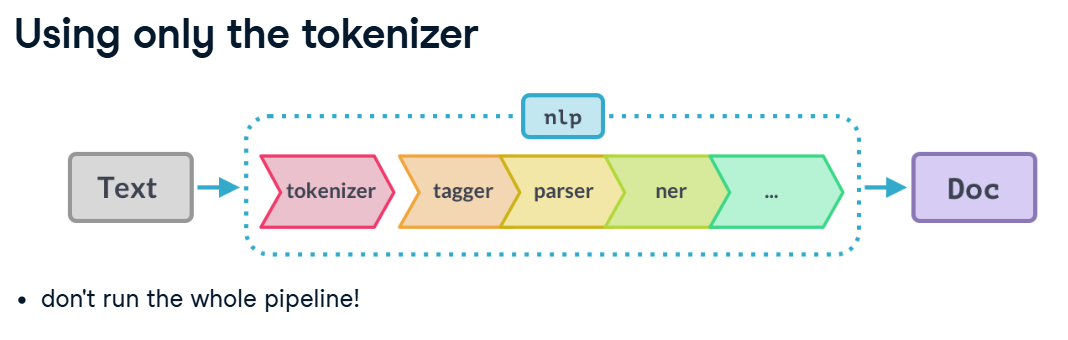

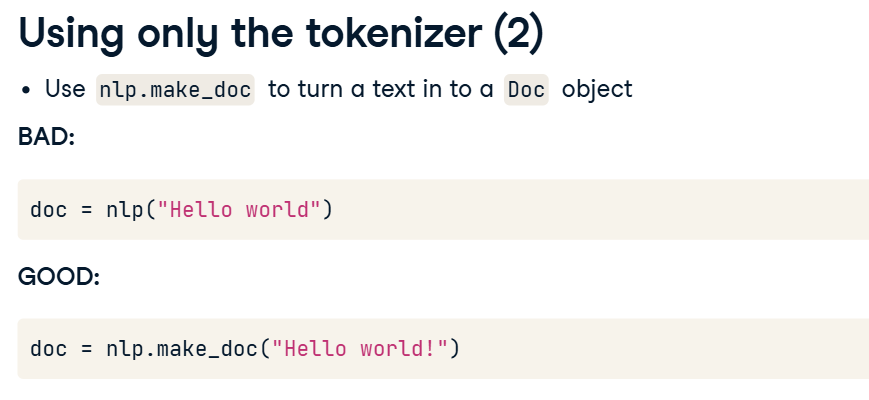

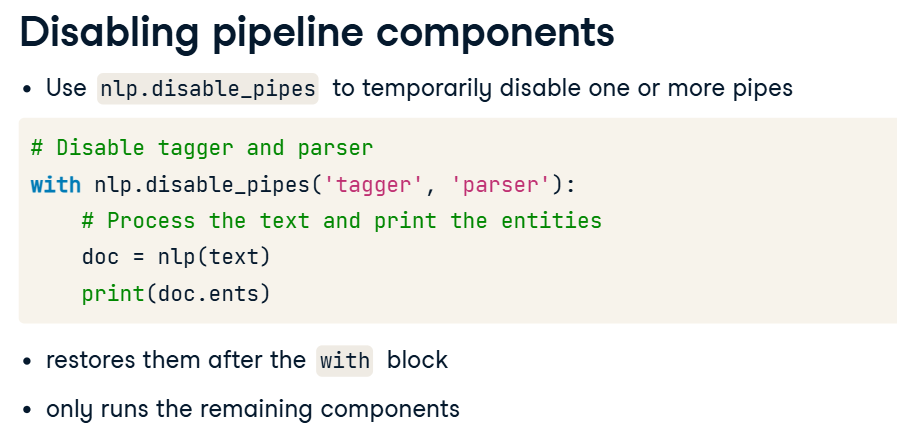

In [35]:
TEXTS = ['McDonalds is my favorite restaurant.',
 'Here I thought @McDonalds only had precooked burgers but it seems they only have not cooked ones?? I have no time to get sick..',
 'People really still eat McDonalds :(',
 'The McDonalds in Spain has chicken wings. My heart is so happy ',
 '@McDonalds Please bring back the most delicious fast food sandwich of all times!!....The Arch Deluxe :P',
 'please hurry and open. I WANT A #McRib SANDWICH SO BAD! :D',
 'This morning i made a terrible decision by gettin mcdonalds and now my stomach is payin for it']

In [36]:
for doc in nlp.pipe(TEXTS):
    print([token.text for token in doc if token.pos_ == 'ADJ'])

['favorite']
['sick']
[]
['happy']
['delicious', 'fast']
[]
['terrible']


In [37]:
# Process the texts and print the entities
docs = list(nlp.pipe(TEXTS))
entities = [doc.ents for doc in docs]
print(*entities)

() () () () () () ()


In [38]:
# Import the Doc class
from spacy.tokens import Doc

# Register the Doc extension 'author' (default None)
Doc.set_extension('author',default=None)

# Register the Doc extension 'book' (default None)
Doc.set_extension('book',default=None)

In [39]:
DATA = [('One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin.',
  {'author': 'Franz Kafka', 'book': 'Metamorphosis'}),
 ("I know not all that may be coming, but be it what it will, I'll go to it laughing.",
  {'author': 'Herman Melville', 'book': 'Moby-Dick or, The Whale'}),
 ('It was the best of times, it was the worst of times.',
  {'author': 'Charles Dickens', 'book': 'A Tale of Two Cities'}),
 ('The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars.',
  {'author': 'Jack Kerouac', 'book': 'On the Road'}),
 ('It was a bright cold day in April, and the clocks were striking thirteen.',
  {'author': 'George Orwell', 'book': '1984'}),
 ('Nowadays people know the price of everything and the value of nothing.',
  {'author': 'Oscar Wilde', 'book': 'The Picture Of Dorian Gray'})]

In [40]:
# Import the Doc class and register the extensions 'author' and 'book'
from spacy.tokens import Doc

for doc, context in nlp.pipe(DATA, as_tuples=True):
    # Set the doc._.book and doc._.author attributes from the context
    doc._.book = context['book']
    doc._.author = context['author']
    
    # Print the text and custom attribute data
    print(doc.text, '\n', "— '{}' by {}".format(doc._.book, doc._.author), '\n')

One morning, when Gregor Samsa woke from troubled dreams, he found himself transformed in his bed into a horrible vermin. 
 — 'Metamorphosis' by Franz Kafka 

I know not all that may be coming, but be it what it will, I'll go to it laughing. 
 — 'Moby-Dick or, The Whale' by Herman Melville 

It was the best of times, it was the worst of times. 
 — 'A Tale of Two Cities' by Charles Dickens 

The only people for me are the mad ones, the ones who are mad to live, mad to talk, mad to be saved, desirous of everything at the same time, the ones who never yawn or say a commonplace thing, but burn, burn, burn like fabulous yellow roman candles exploding like spiders across the stars. 
 — 'On the Road' by Jack Kerouac 

It was a bright cold day in April, and the clocks were striking thirteen. 
 — '1984' by George Orwell 

Nowadays people know the price of everything and the value of nothing. 
 — 'The Picture Of Dorian Gray' by Oscar Wilde 



## Training and Updating Models

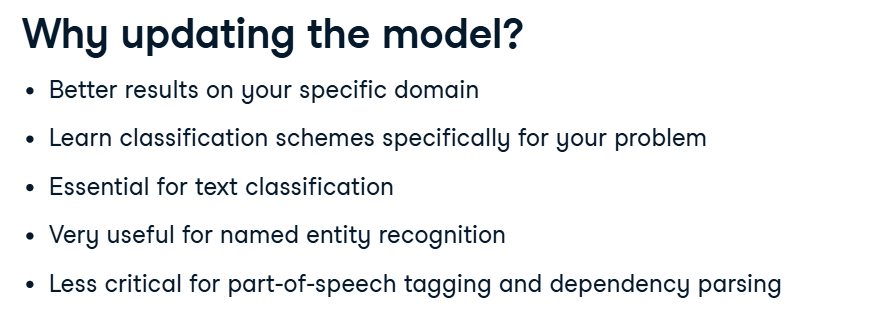

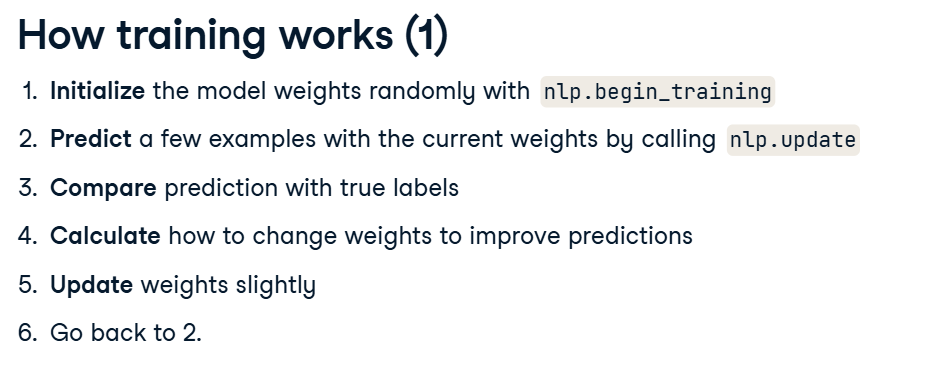

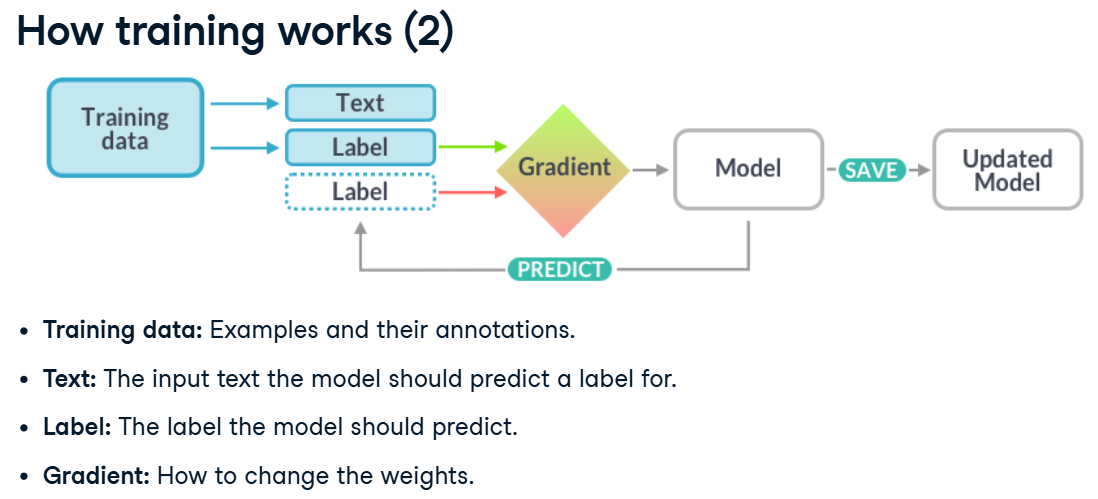

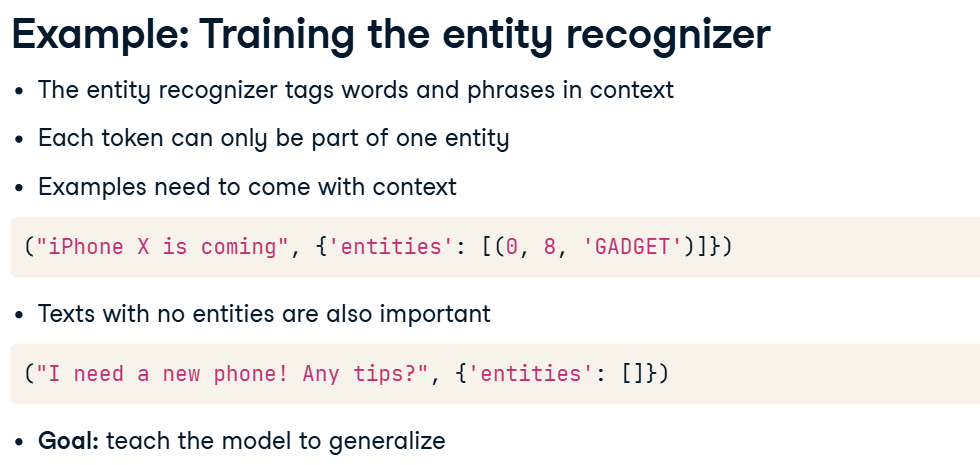

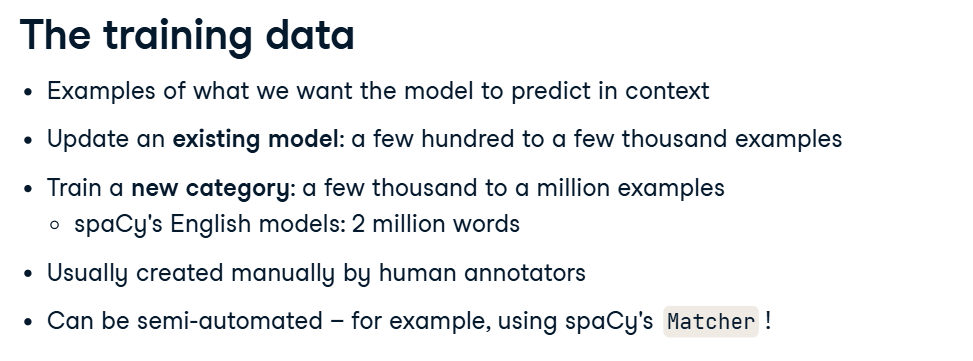

In [41]:
TEXTS = ['How to preorder the iPhone X',
 'iPhone X is coming',
 'Should I pay $1,000 for the iPhone X?',
 'The iPhone 8 reviews are here',
 'Your iPhone goes up to 11 today',
 'I need a new phone! Any tips?']

In [42]:
nlp = spacy.load('en_core_web_sm')

matcher = Matcher(nlp.vocab)

In [43]:
# Two tokens whose lowercase forms match 'iphone' and 'x'

# Token whose lowercase form matches 'iphone' and an optional digit
pattern2 = [[{'LOWER': 'iphone'}, {'LOWER': 'x'}] , [{'LOWER': 'iphone'}, {'IS_DIGIT': True, 'OP': '?'}]]

# Add patterns to the matcher
matcher.add('GADGET', pattern2)

In [44]:
# Create a Doc object for each text in TEXTS
for doc in nlp.pipe(TEXTS):
    # Find the matches in the doc
    matches = matcher(doc)
    
    # Get a list of (start, end, label) tuples of matches in the text
    entities = [(start, end, 'GADGET') for match_id, start, end in matches]
    print(doc.text, entities)    

How to preorder the iPhone X [(4, 6, 'GADGET'), (4, 5, 'GADGET')]
iPhone X is coming [(0, 2, 'GADGET'), (0, 1, 'GADGET')]
Should I pay $1,000 for the iPhone X? [(7, 9, 'GADGET'), (7, 8, 'GADGET')]
The iPhone 8 reviews are here [(1, 2, 'GADGET'), (1, 3, 'GADGET')]
Your iPhone goes up to 11 today [(1, 2, 'GADGET')]
I need a new phone! Any tips? []


In [45]:
TRAINING_DATA = []

# Create a Doc object for each text in TEXTS
for doc in nlp.pipe(TEXTS):
    # Match on the doc and create a list of matched spans
    spans = [doc[start:end] for match_id, start, end in matcher(doc)]
    # Get (start character, end character, label) tuples of matches
    entities = [(span.start_char, span.end_char, 'GADGET') for span in spans]
    
    # Format the matches as a (doc.text, entities) tuple
    training_example = (doc.text, {'entities': entities})
    # Append the example to the training data
    TRAINING_DATA.append(training_example)
    
print(*TRAINING_DATA, sep='\n')    

('How to preorder the iPhone X', {'entities': [(20, 28, 'GADGET'), (20, 26, 'GADGET')]})
('iPhone X is coming', {'entities': [(0, 8, 'GADGET'), (0, 6, 'GADGET')]})
('Should I pay $1,000 for the iPhone X?', {'entities': [(28, 36, 'GADGET'), (28, 34, 'GADGET')]})
('The iPhone 8 reviews are here', {'entities': [(4, 10, 'GADGET'), (4, 12, 'GADGET')]})
('Your iPhone goes up to 11 today', {'entities': [(5, 11, 'GADGET')]})
('I need a new phone! Any tips?', {'entities': []})


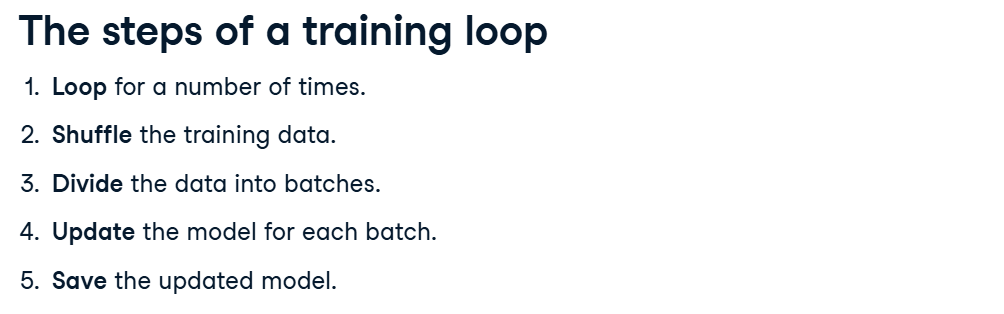

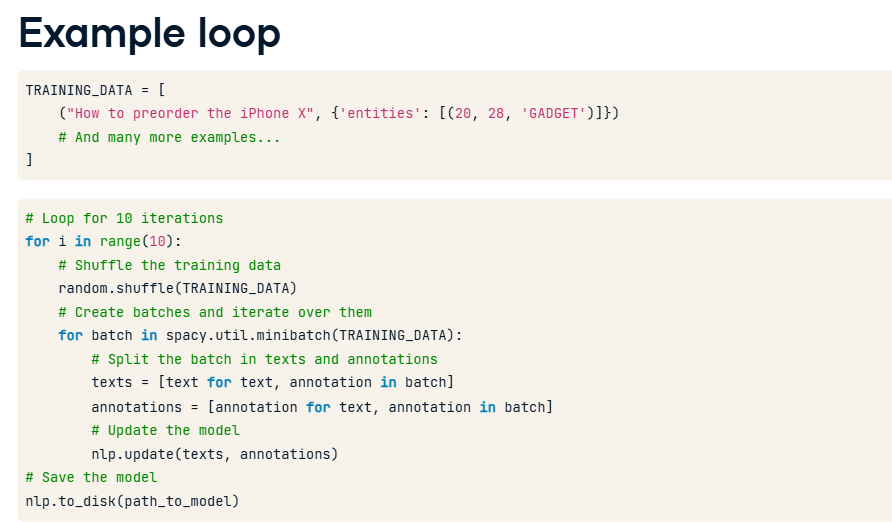

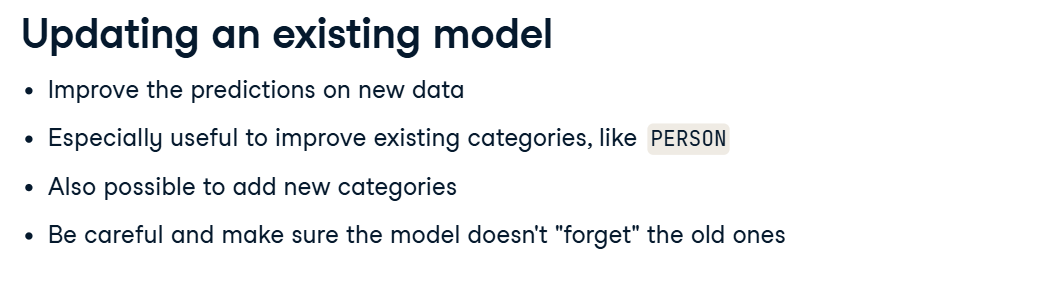

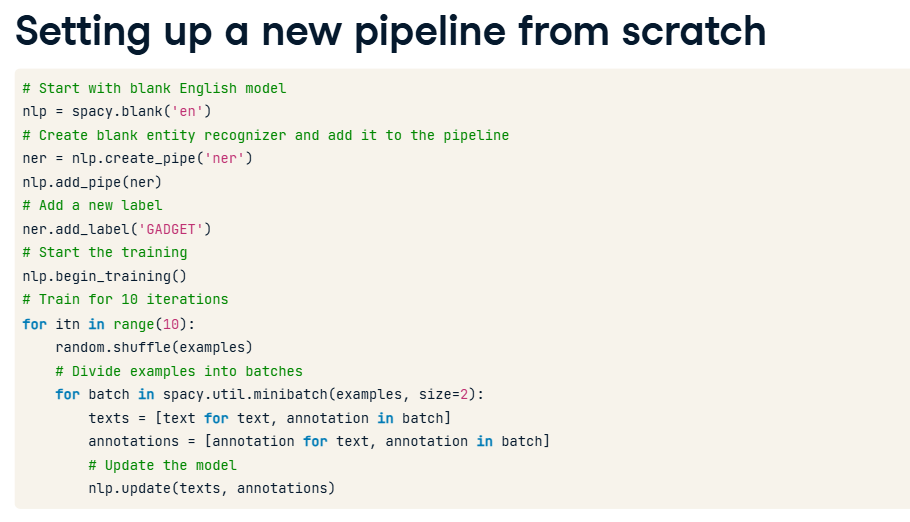

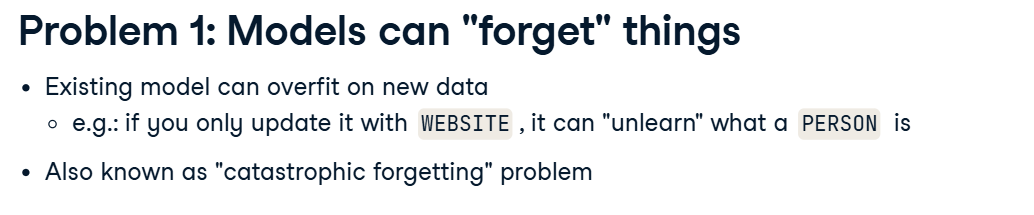

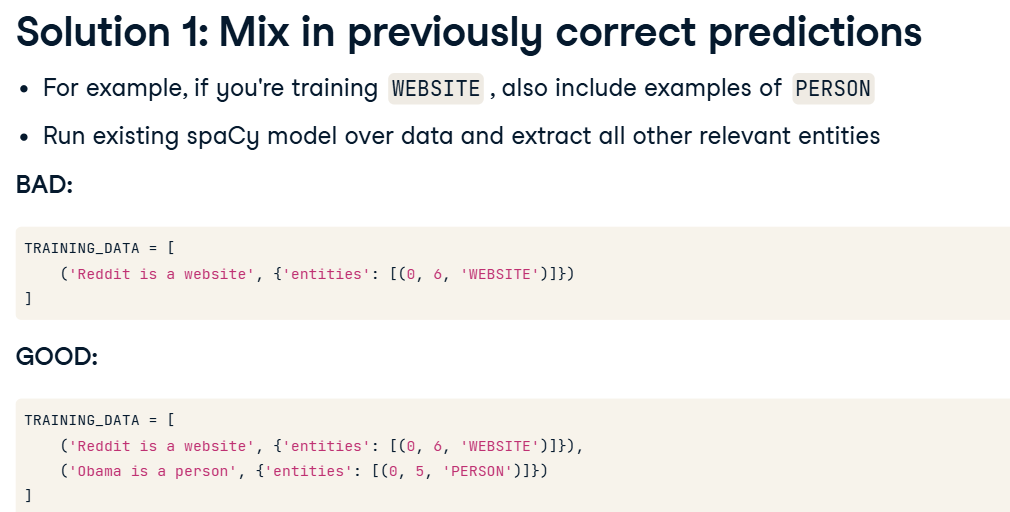

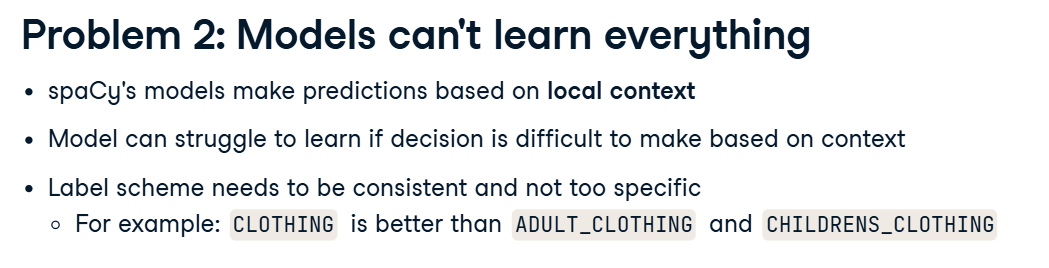

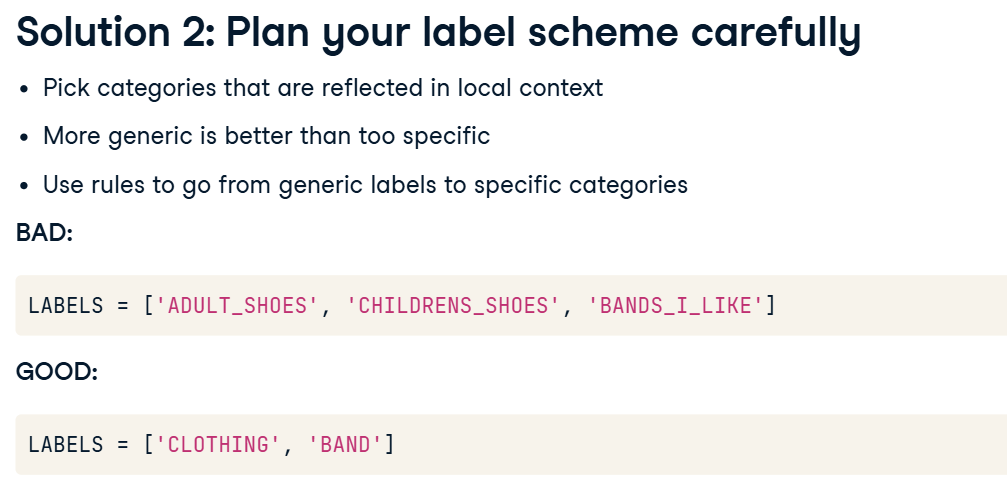

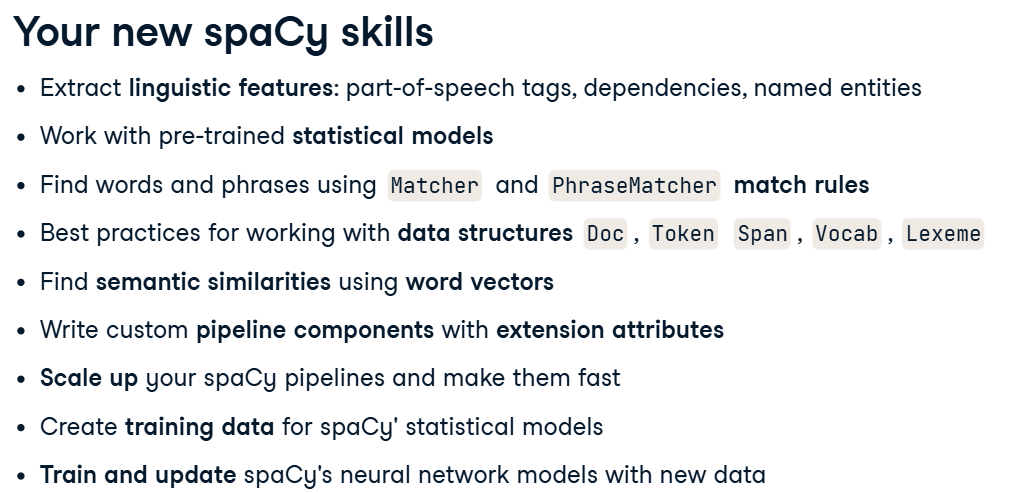